# 1. Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from get_data import init_column_map, pull, pull_data_rowwise
import numpy as np

In [33]:
# Define all variable categories
from variables import (
    demographics, 
    input_variables_vehicle_ownership, 
    familiarity, 
    kms_driven, 
    renewables_at_home,
    parking, 
    q6a_cols, 
    energ_literacy, 
    renewables_at_home, 
    intent_to_purchase_vehicle,
    benefits_v2g, 
    concerns_v2g, 
    interest_in_services, 
    consider_using_NRMA_for,
    charging_control, 
    preference_on_batt_use, 
    expected_return,
    q6a_petrol, 
    q6a_ev, 
    q6a_plughyb, 
    q6a_hybrid,
    feature_label_map
)

# 2. Descriptive Analytics

In [48]:
csv_file = './data/survey_pre_processed_data.csv'

In [49]:
init_column_map(csv_file)

In [50]:
for col in input_variables_vehicle_ownership:
    freq = pull(col, csv_file)  # returns a dictionary {answer_value: count}
    print(f"Frequency for {col} => {freq}")

for col in demographics:
    freq = pull(col, csv_file)
    print(f"Frequency for {col} => {freq}")

Frequency for Q1_1 => {'1': 874, '0': 484}
Frequency for Q1_2 => {'0': 590, '1': 768}
Frequency for Q1_3 => {'0': 1325, '1': 33}
Frequency for Q1_4 => {'0': 1247, '1': 111}
Frequency for Q1_99 => {'0': 1355, '1': 3}
Frequency for gender => {'Male': 859, 'Not Stated': 140, 'Female': 359}
Frequency for colour_plus => {'LILAC': 232, 'KHAKI': 275, 'PURPLE': 166, 'GREY': 353, 'ORANGE': 167, 'BROWN': 41, 'RED': 29, 'UNKNOWN': 8, 'YELLOW': 36, 'CYAN': 11, 'GREEN': 6}
Frequency for region => {'METROPOLITAN': 478, 'RURAL': 251, 'INTERSTATE': 221, 'REGIONAL': 403, 'UNKNOWN': 5}
Frequency for Q20 => {'2': 774, '3': 178, '4': 161, '5 or more': 57, '1': 188}
Frequency for Q21 => {'Freestanding house': 1025, 'Townhouse': 71, 'Apartment/unit': 179, 'Semidetached or terrace': 62, 'Other (please specify)': 21}
Frequency for Q22 => {'Own outright': 919, 'Own with mortgage': 306, 'Other (please specify)': 31, 'Rent': 102}
Frequency for AgeBand => {'Prefer not to say': 36, '65+': 682, '55-64 years': 299, 

In [51]:
# Picking the columns to be analysed
columns_of_interest = (input_variables_vehicle_ownership + demographics + energ_literacy + intent_to_purchase_vehicle + benefits_v2g + concerns_v2g + charging_control + preference_on_batt_use + parking + renewables_at_home)
rows_data = pull_data_rowwise(columns_of_interest, csv_file)

In [52]:
# Create a pandas DataFrame:
df = pd.DataFrame(rows_data, columns=columns_of_interest)

# Because Q1_x are '0' or '1' strings, converting them to numeric for easier ops
for c in input_variables_vehicle_ownership:
    # convert '0'/'1' -> 0/1
    df[c] = df[c].astype(int)  

df

,Q1_1,Q1_2,Q1_3,Q1_4,Q1_99,gender,colour_plus,region,Q20,Q21,...,Q17_3,Q18,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q8_1,Q8_2,Q8_99
0,1,0,0,0,0,Male,LILAC,METROPOLITAN,2,Freestanding house,...,1,Discharge to my home AND discharge to the grid...,1,1,0,0,0,1,0,0
1,1,1,0,0,0,Male,LILAC,RURAL,2,Freestanding house,...,3,"Discharge to my home only, to reduce my energy...",0,1,0,0,0,1,1,0
2,1,0,0,0,0,Not Stated,KHAKI,INTERSTATE,2,Townhouse,...,,,1,1,0,1,0,0,0,1
3,0,0,0,1,0,Male,PURPLE,METROPOLITAN,2,Freestanding house,...,2,"Discharge to my home only, to reduce my energy...",0,0,0,1,0,0,0,1
4,1,1,0,1,0,Male,PURPLE,INTERSTATE,3,Freestanding house,...,3,Discharge to my home AND discharge to the grid...,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,1,0,0,0,Female,KHAKI,REGIONAL,2,Townhouse,...,2,Discharge to my home AND discharge to the grid...,0,1,0,0,0,1,1,0
1354,1,0,0,0,0,Male,LILAC,REGIONAL,2,Apartment/unit,...,1,"Discharge to my home only, to reduce my energy...",0,0,1,0,0,0,0,1
1355,1,1,0,0,0,Male,GREY,REGIONAL,2,Freestanding house,...,3,Discharge to my home AND discharge to the grid...,0,1,0,0,0,1,0,0
1356,0,1,0,0,0,Male,LILAC,RURAL,1,Other (please specify),...,3,None of these,0,0,0,1,0,0,0,1


## 2.1. Demographics:

<Figure size 800x600 with 0 Axes>

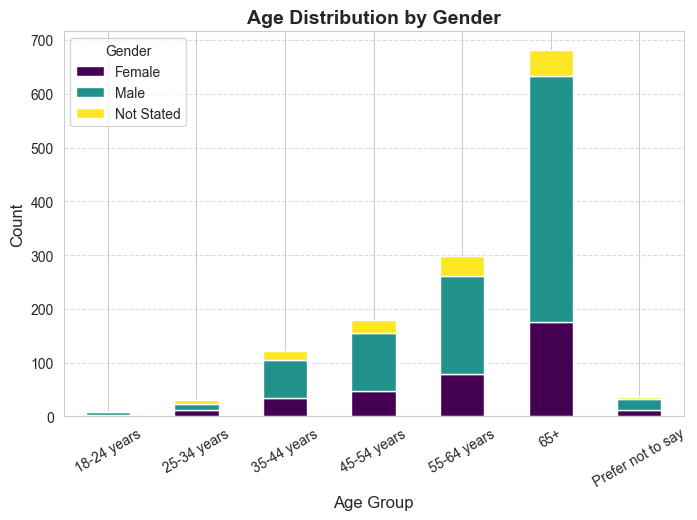

In [53]:
plt.figure(figsize=(8, 6))
age_gender = df.groupby(["AgeBand", "gender"]).size().unstack()
age_gender.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))

plt.title("Age Distribution by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

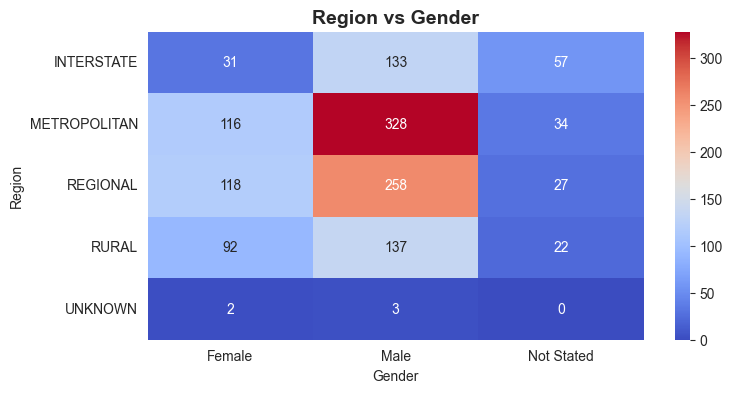

In [54]:
plt.figure(figsize=(8, 4))
sns.heatmap(pd.crosstab(df["region"], df["gender"]), annot=True, cmap="coolwarm", fmt="d")
plt.title("Region vs Gender", fontsize=14, fontweight="bold")
plt.ylabel("Region")
plt.xlabel("Gender")
plt.show()


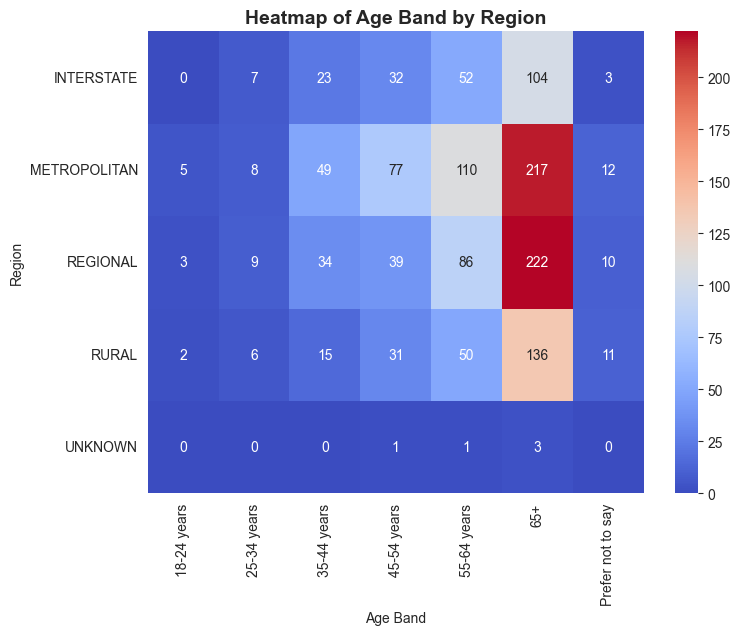

In [55]:
plt.figure(figsize=(8, 6))
heatmap_data = pd.crosstab(df["region"], df["AgeBand"])
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap of Age Band by Region", fontsize=14, fontweight="bold")
plt.ylabel("Region")
plt.xlabel("Age Band")
plt.show()


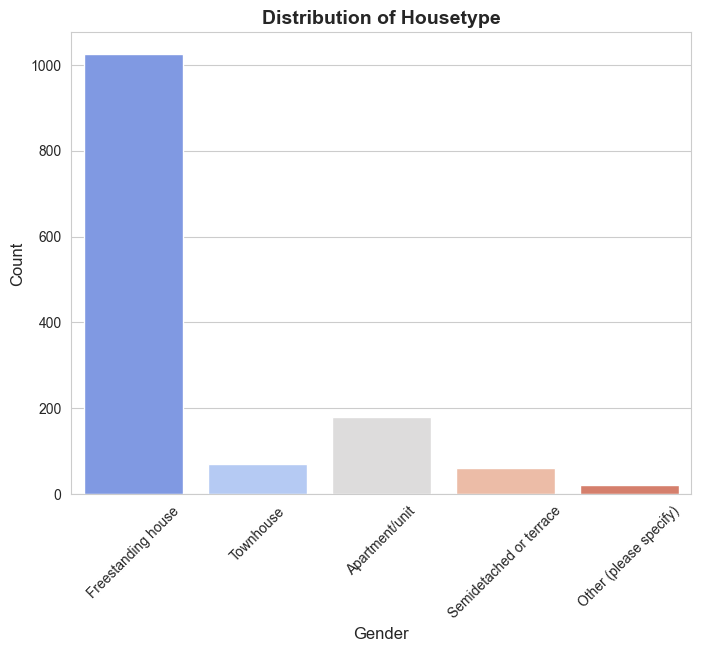

In [56]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Add a background grid
sns.countplot(x="Q21", data=df, palette="coolwarm")  # Use a color palette
plt.title("Distribution of Housetype", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


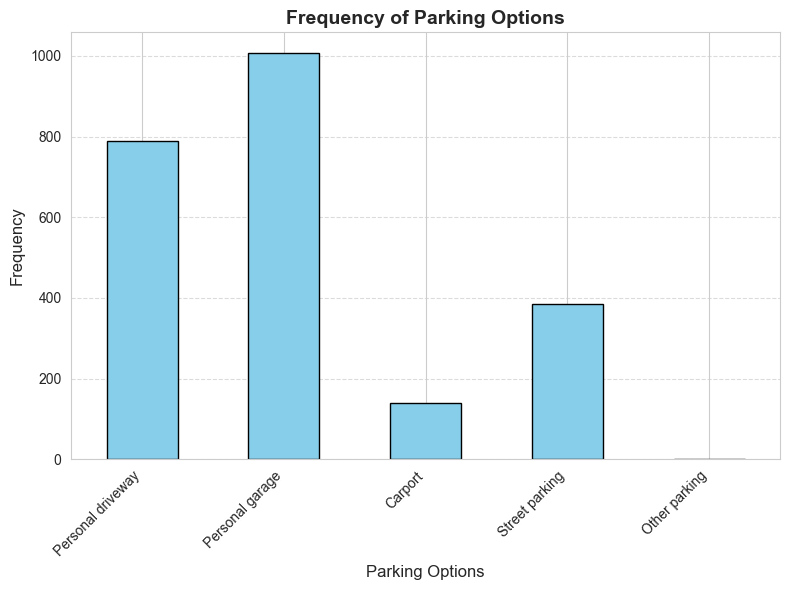

In [57]:
# Replace short codes with descriptive labels using feature_label_map
parking_labels = [feature_label_map.get(col, col) for col in parking]

# Count the frequency of responses for each parking variable
parking_counts = df[parking].apply(pd.to_numeric, errors='coerce').sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
parking_counts.index = parking_labels  # Use descriptive labels for x-axis
parking_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Frequency of Parking Options", fontsize=14, fontweight="bold")
plt.xlabel("Parking Options", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

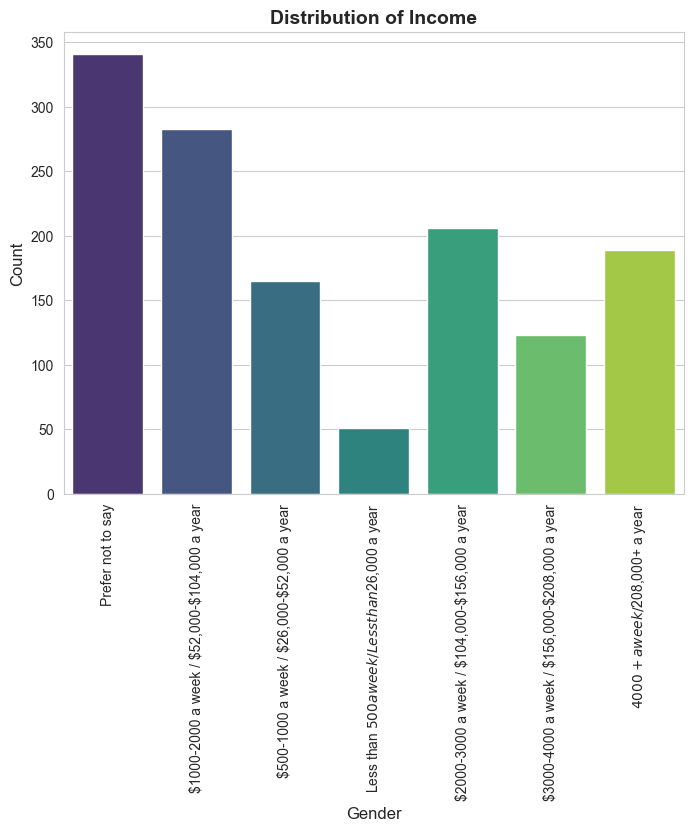

In [58]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Add a background grid
sns.countplot(x="Q24", data=df, palette="viridis")  # Use a color palette
plt.title("Distribution of Income", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


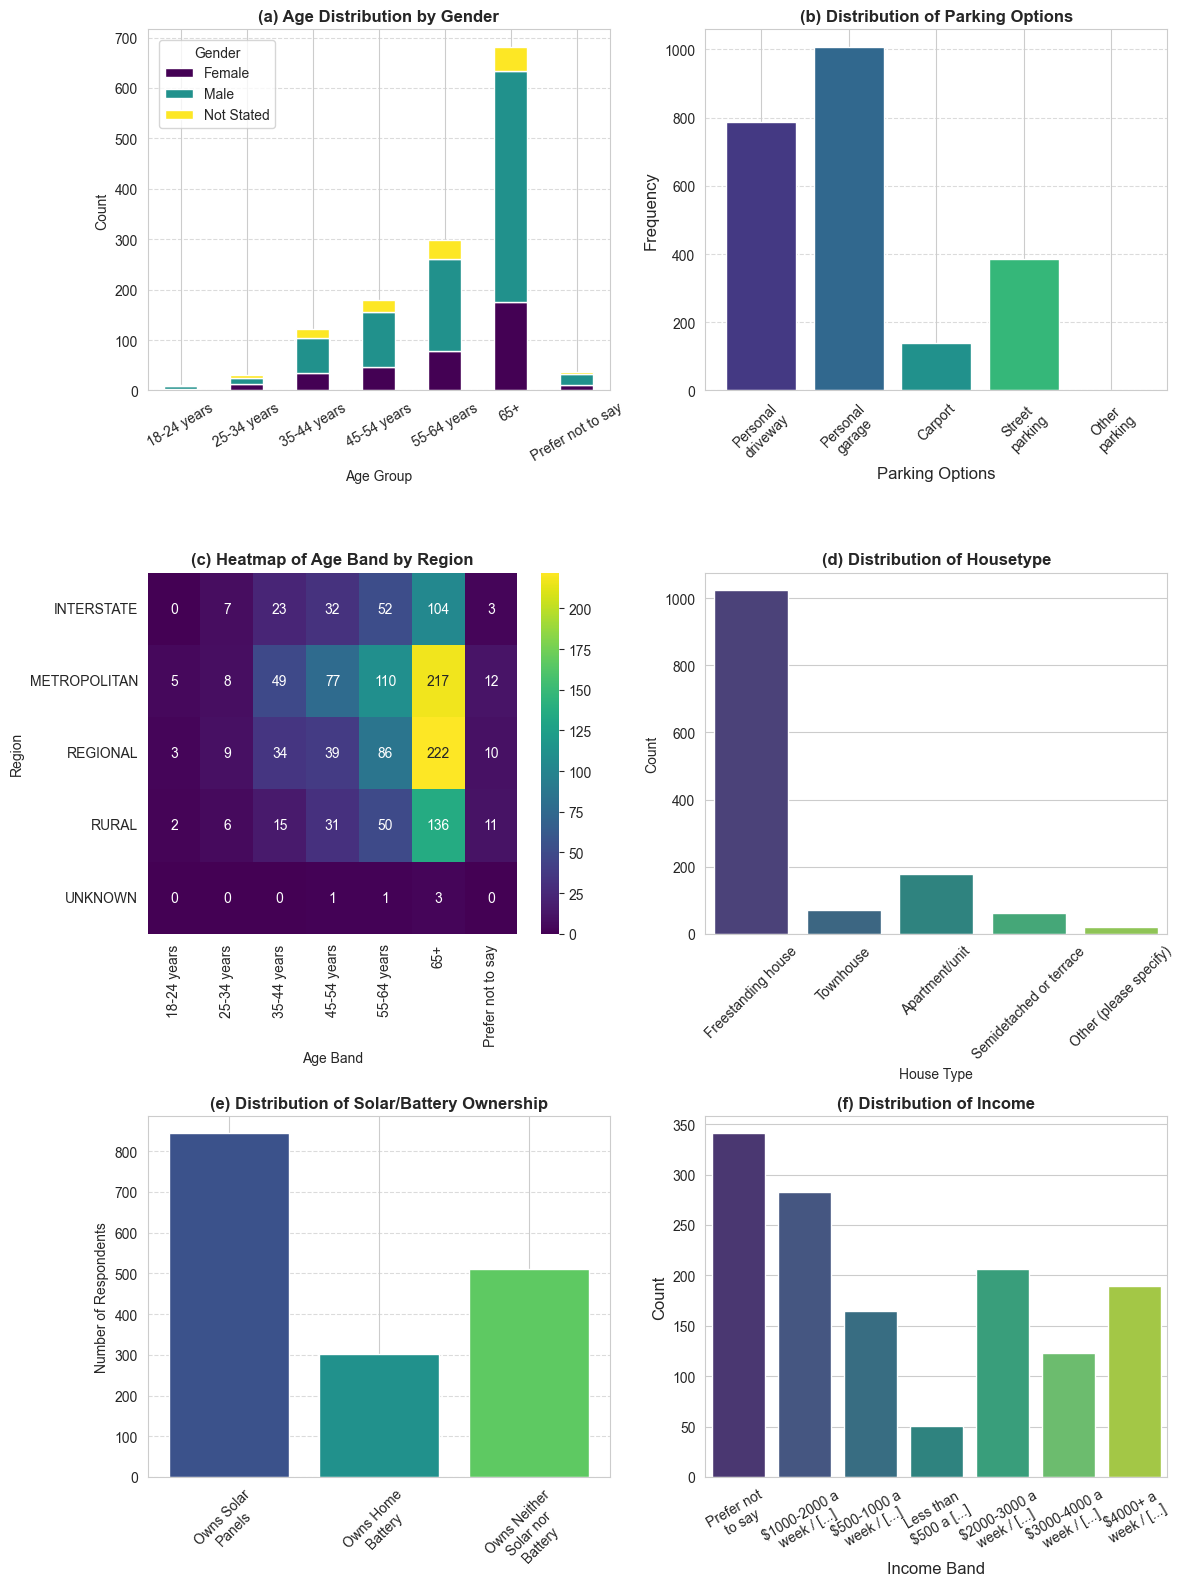

In [ ]:
import textwrap

# --- Helper function for wrapping labels ---
def wrap_tick_labels(labels, width=12):
    return [
        '\n'.join(textwrap.wrap(str(label), width=width, break_long_words=False, max_lines=3))
        for label in labels
    ]

# --- Data prep
df[renewables_at_home + parking] = df[renewables_at_home + parking].apply(pd.to_numeric, errors='coerce')

ownership_counts = df[renewables_at_home].sum()
ownership_counts.index = [feature_label_map[col] for col in renewables_at_home]

parking_counts = df[parking].sum()
parking_counts.index = [feature_label_map[col] for col in parking]

parking_colors    = sns.color_palette("viridis", len(parking_counts))
ownership_colors  = sns.color_palette("viridis", len(ownership_counts))

fig, axes = plt.subplots(3, 2, figsize=(12, 16))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# (a) Age Distribution by Gender
age_gender = df.groupby(["AgeBand", "gender"]).size().unstack()
age_gender.plot(
    kind="bar", stacked=True, colormap="viridis",
    ax=axes[0, 0], legend=False
)
axes[0, 0].set_title("(a) Age Distribution by Gender", fontsize=12, fontweight="bold")
axes[0, 0].set_xlabel("Age Group")
axes[0, 0].set_ylabel("Count")
axes[0, 0].tick_params(axis='x', rotation=30)
axes[0, 0].grid(axis="y", linestyle="--", alpha=0.7)
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0, 0].legend(
    handles, labels,
    title="Gender",
    loc="upper left",
    fontsize=10,
    bbox_to_anchor=(0.01, 0.99)
)

# (b) Distribution of Parking Options with viridis palette
axes[0, 1].bar(
    parking_counts.index,
    parking_counts.values,
    color=parking_colors
)
axes[0, 1].set_title("(b) Distribution of Parking Options", fontsize=12, fontweight="bold")
axes[0, 1].set_xlabel("Parking Options", fontsize=12)
axes[0, 1].set_ylabel("Frequency", fontsize=12)
axes[0, 1].grid(axis="y", linestyle="--", alpha=0.7)
# -- Wrap and rotate x-tick labels for Parking Options
wrapped_parking_labels = wrap_tick_labels(parking_counts.index, width=12)
axes[0, 1].set_xticks(range(len(wrapped_parking_labels)))
axes[0, 1].set_xticklabels(wrapped_parking_labels, rotation=45, ha='center')

# (c) Heatmap of Age Band by Region
heatmap_data = pd.crosstab(df["region"], df["AgeBand"])
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt="d", ax=axes[1, 0])
axes[1, 0].set_title("(c) Heatmap of Age Band by Region", fontsize=12, fontweight="bold")
axes[1, 0].set_xlabel("Age Band")
axes[1, 0].set_ylabel("Region")

# (d) Distribution of Housetype
sns.countplot(x="Q21", data=df, palette="viridis", ax=axes[1, 1])
axes[1, 1].set_title("(d) Distribution of Housetype", fontsize=12, fontweight="bold")
axes[1, 1].set_xlabel("House Type")
axes[1, 1].set_ylabel("Count")
axes[1, 1].tick_params(axis='x', rotation=45)

# (e) Distribution of Solar/Battery Ownership with viridis palette
axes[2, 0].bar(
    ownership_counts.index,
    ownership_counts.values,
    color=ownership_colors
)
axes[2, 0].set_title("(e) Distribution of Solar/Battery Ownership", fontsize=12, fontweight="bold")
axes[2, 0].set_ylabel("Number of Respondents")
axes[2, 0].grid(axis="y", linestyle="--", alpha=0.7)
# -- Wrap and rotate x-tick labels for Ownership
wrapped_ownership_labels = wrap_tick_labels(ownership_counts.index, width=12)
axes[2, 0].set_xticks(range(len(wrapped_ownership_labels)))
axes[2, 0].set_xticklabels(wrapped_ownership_labels, rotation=45, ha='center')

# (f) Distribution of Income
sns.countplot(x="Q24", data=df, palette="viridis", ax=axes[2, 1])
axes[2, 1].set_title("(f) Distribution of Income", fontsize=12, fontweight="bold")
axes[2, 1].set_xlabel("Income Band", fontsize=12)
axes[2, 1].set_ylabel("Count", fontsize=12)
axes[2, 1].tick_params(axis='x', rotation=30)

# Wrap xtick labels if needed
labels = axes[2, 1].get_xticklabels()
wrapped_labels = [
    '\n'.join(textwrap.wrap(label.get_text(), width=12, break_long_words=False, max_lines=2))
    for label in labels
]
axes[2, 1].set_xticklabels(wrapped_labels, rotation=30, ha='center')

plt.tight_layout()
plt.show()


In [61]:
age_counts = df["AgeBand"].value_counts(dropna=False)
age_perc = age_counts / age_counts.sum() * 100
print(age_perc)  # Use for reporting % in each band, e.g., 65+ and 55–64


65+                  50.220913
55-64 years          22.017673
45-54 years          13.254786
35-44 years           8.910162
Prefer not to say     2.650957
25-34 years           2.209131
18-24 years           0.736377
Name: AgeBand, dtype: float64


In [62]:
region_counts = df["region"].value_counts(dropna=False)
region_perc = region_counts / region_counts.sum() * 100
print(region_perc)  # Use for reporting % in each region


METROPOLITAN    35.198822
REGIONAL        29.675994
RURAL           18.483063
INTERSTATE      16.273932
UNKNOWN          0.368189
Name: region, dtype: float64


In [63]:
house_counts = df["Q21"].value_counts(dropna=False)
house_perc = house_counts / house_counts.sum() * 100
print(house_perc)  # Use for reporting % freestanding, etc.


Freestanding house         75.478645
Apartment/unit             13.181149
Townhouse                   5.228277
Semidetached or terrace     4.565538
Other (please specify)      1.546392
Name: Q21, dtype: float64


In [64]:
for col in parking:
    pct = df[col].mean() * 100
    print(f"{feature_label_map[col]}: {pct:.1f}%")


Personal driveway: 58.2%
Personal garage: 74.4%
Carport: 10.3%
Street parking: 28.3%
Other parking: 0.0%


In [ ]:
income_counts = df["Q24"].value_counts(dropna=False)
income_perc = income_counts / income_counts.sum() * 100
print(income_perc)

Prefer not to say                                   25.110457
$1000-2000 a week / $52,000-$104,000 a year         20.839470
$2000-3000 a week / $104,000-$156,000 a year        15.169367
$4000+ a week / $208,000+ a year                    13.917526
$500-1000 a week / $26,000-$52,000 a year           12.150221
$3000-4000 a week / $156,000-$208,000 a year         9.057437
Less than $500 a week / Less than $26,000 a year     3.755523
Name: Q24, dtype: float64


In [70]:
solar_col = [col for col in renewables_at_home if "solar" in feature_label_map[col].lower()][0]
solar_pct = df[solar_col].mean() * 100
print(f"Solar panels: {solar_pct:.1f}%")


Solar panels: 62.2%


In [77]:
# Calculate % with solar panels
solar_pct = df['Q8_1'].mean() * 100

# Calculate % with home battery
battery_pct = df['Q8_2'].mean() * 100

# Calculate % with neither (assuming Q8_99 means "owns neither" as 1)
neither_pct = df['Q8_99'].mean() * 100

print(f"Solar panels: {solar_pct:.1f}%")
print(f"Home battery: {battery_pct:.1f}%")
print(f"Neither solar nor battery: {neither_pct:.1f}%")


Solar panels: 62.2%
Home battery: 22.3%
Neither solar nor battery: 37.6%


In [71]:
battery_col = [col for col in renewables_at_home if "batter" in feature_label_map[col].lower()][0]
battery_pct = df[battery_col].mean() * 100
print(f"Home battery: {battery_pct:.1f}%")


Home battery: 22.3%


In [68]:
neither_pct = 100 - (df[renewables_at_home].any(axis=1).mean() * 100)
print(f"Neither: {neither_pct:.1f}%")


Neither: 0.0%


## 2.3. Habits

In [46]:
##########################################
# Pull the data from CSV
##########################################
init_column_map(csv_file)

# We'll get both Q6a columns and the demographic columns
# columns_of_interest = q6a_cols + demographics + energ_literacy 
columns_of_interest = q6a_cols + input_variables_vehicle_ownership + demographics + energ_literacy + intent_to_purchase_vehicle + benefits_v2g + concerns_v2g + charging_control + preference_on_batt_use

rows = pull_data_rowwise(columns_of_interest, csv_file)

# Make a DataFrame
df = pd.DataFrame(rows, columns=columns_of_interest)

In [16]:
# Converting  "0 - Weekdays"
for col in q6a_cols:
    df[col] = df[col].replace("0 - Weekdays", 0)  # Convert "0 - Weekdays" to 0
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert all values to numbers
# Debugging: Check unique values in each column
for col in q6a_cols:
    print(f"Unique values in {col}: {df[col].dropna().unique()}")

Unique values in Q6ax1_1: [3. 5. 2. 4. 0. 1.]
Unique values in Q6ax1_2: [5. 1. 3. 2. 4. 0.]
Unique values in Q6ax1_3: [5. 2. 0. 4. 3. 1.]
Unique values in Q6ax2_1: [5. 4. 3. 1. 2. 0.]
Unique values in Q6ax2_2: [5. 4. 3. 2. 0. 1.]
Unique values in Q6ax2_3: [5. 4. 3. 1. 0. 2.]
Unique values in Q6ax3_1: [3. 1. 4. 0. 2. 5.]
Unique values in Q6ax3_2: [5. 4. 2. 3. 1.]
Unique values in Q6ax3_3: [5. 2. 3. 4.]
Unique values in Q6ax4_1: [0. 2. 5. 4. 3. 1.]
Unique values in Q6ax4_2: [5. 2. 3. 0. 4. 1.]
Unique values in Q6ax4_3: [5. 3. 0. 1. 4. 2.]


In [17]:
# Count missing responses for each charging question
missing_counts = (df[q6a_cols] == 0).sum()
# Display summary of non-responses per column
print("Number of responses recorded as 0:")
print(missing_counts)


Number of responses recorded as 0:
Q6ax1_1    118
Q6ax1_2     28
Q6ax1_3     31
Q6ax2_1    102
Q6ax2_2     24
Q6ax2_3     14
Q6ax3_1      4
Q6ax3_2      0
Q6ax3_3      0
Q6ax4_1     12
Q6ax4_2      6
Q6ax4_3      9
dtype: int64


In [18]:
# Checking number of vehicles per type
print(df[q6a_petrol + q6a_ev + q6a_plughyb + q6a_hybrid].notna().sum())

Q6ax1_1    874
Q6ax1_2    874
Q6ax1_3    874
Q6ax2_1    768
Q6ax2_2    768
Q6ax2_3    768
Q6ax3_1     33
Q6ax3_2     33
Q6ax3_3     33
Q6ax4_1    111
Q6ax4_2    111
Q6ax4_3    111
dtype: int64


In [19]:
# Prepare data for heatmap
counts_dict = {vehicle: [] for vehicle in ["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"]}
time_periods = ["10AM-3PM", "4PM-9PM", "9PM-6AM"]
vehicle_types = ["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"]

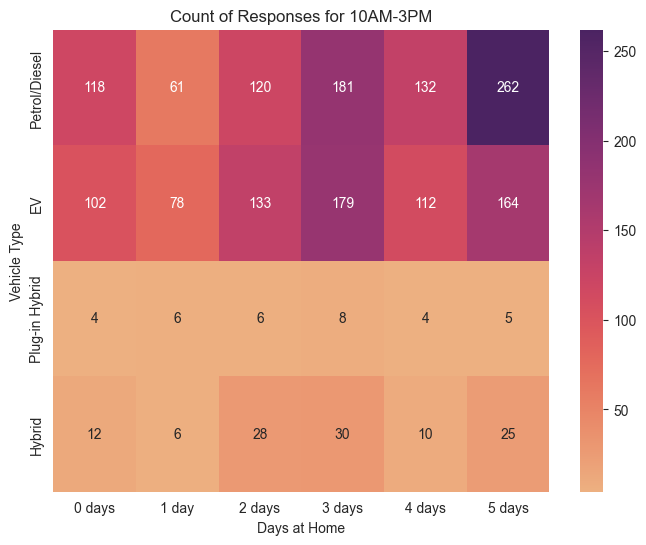

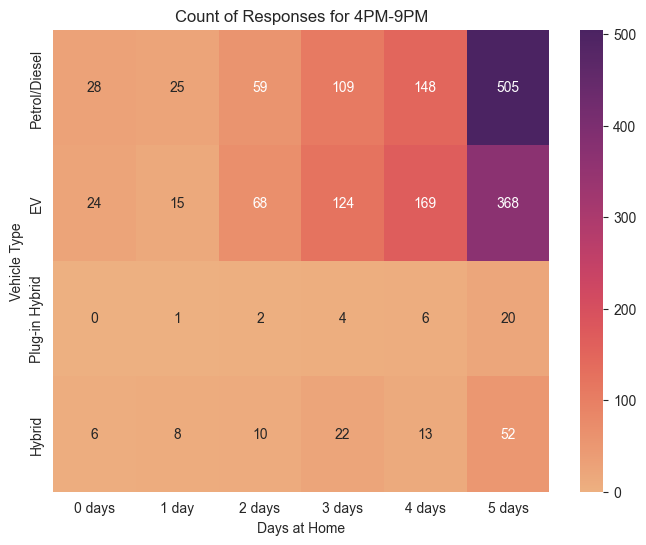

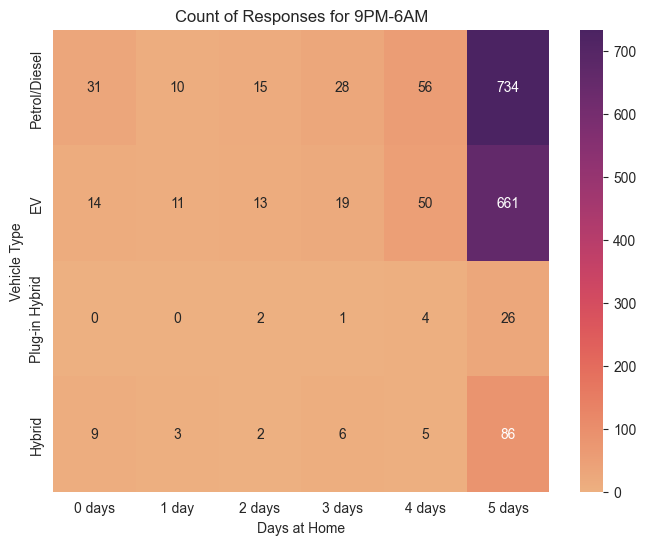

In [20]:
# Iterate over each time period and vehicle type
for time_idx in range(3):  # Three time periods
    for vehicle_idx, vehicle_label in enumerate(vehicle_types):
        vehicle_columns = [q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid][vehicle_idx]
        counts = df[vehicle_columns[time_idx]].dropna().astype(int).value_counts().reindex(range(6), fill_value=0).values
        counts_dict[vehicle_label].append(counts)

# Convert to numpy array and reshape correctly
heatmap_data = np.array([counts_dict[v] for v in vehicle_types])  # Ensures order matches vehicle_types

# Debugging: Compare values with Excel
## print("Heatmap Data:\n", heatmap_data)

# Plot heatmap for each time period
for i, time_period in enumerate(time_periods):
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data[:, i, :], annot=True, cmap="flare", fmt="d", 
                xticklabels=["0 days", "1 day", "2 days", "3 days", "4 days", "5 days"], 
                yticklabels=vehicle_types)

    plt.title(f"Count of Responses for {time_period}")
    plt.xlabel("Days at Home")
    plt.ylabel("Vehicle Type")
    plt.show()

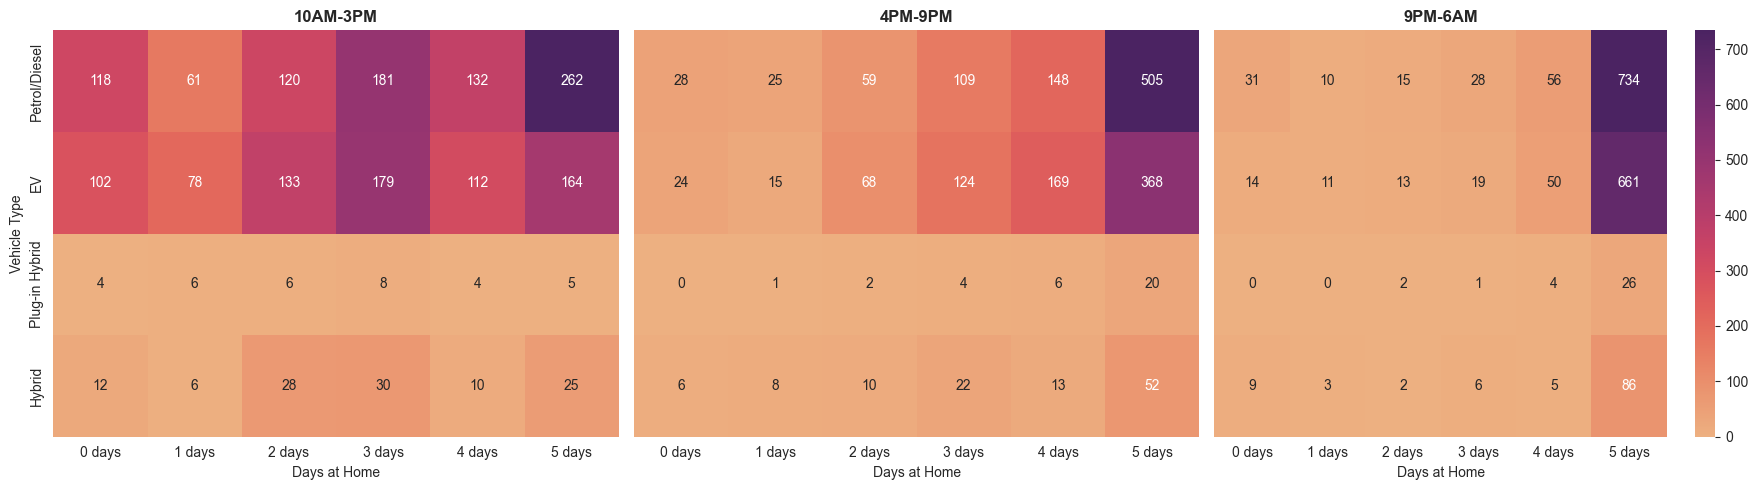

In [21]:
'''import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define your labels and columns (as before)
vehicle_types = ["Petrol/Diesel", "Electric Vehicle", "Plug-in Hybrid", "Hybrid"]
time_periods = ["10am–3pm", "4pm–9pm", "9pm–6am"]

q6a_petrol   = ["Q6ax1_1", "Q6ax1_2", "Q6ax1_3"]
q6a_ev       = ["Q6ax2_1", "Q6ax2_2", "Q6ax2_3"]
q6a_plughyb  = ["Q6ax3_1", "Q6ax3_2", "Q6ax3_3"]
q6a_hybrid   = ["Q6ax4_1", "Q6ax4_2", "Q6ax4_3"]
'''
# Build counts per vehicle type and time period, parsing numeric days
counts_dict = {v: [] for v in vehicle_types}
for time_idx in range(len(time_periods)):
    for vehicle_idx, vehicle_label in enumerate(vehicle_types):
        col = [q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid][vehicle_idx][time_idx]
        # Extract leading number from strings like "0 - Weekdays"
        nums = (
            df[col]
            .dropna()
            .astype(str)
            .str.extract(r"^(\d+)", expand=False)
            .dropna()
            .astype(int)
        )
        counts = nums.value_counts().reindex(range(6), fill_value=0).values
        counts_dict[vehicle_label].append(counts)

# Convert to numpy array: shape (4 vehicle types, 3 periods, 6 days)
heatmap_data = np.array([counts_dict[v] for v in vehicle_types])

# Plot them side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, time_period in enumerate(time_periods):
    sns.heatmap(
        heatmap_data[:, i, :],
        annot=True,
        cmap="flare",
        fmt="d",
        xticklabels=[f"{d} days" for d in range(6)],
        yticklabels=vehicle_types,
        ax=axes[i],
        cbar=(i == 2)
    )
    axes[i].set_title(f"{time_period}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Days at Home")
    if i == 0:
        axes[i].set_ylabel("Vehicle Type")

plt.tight_layout()
plt.show()


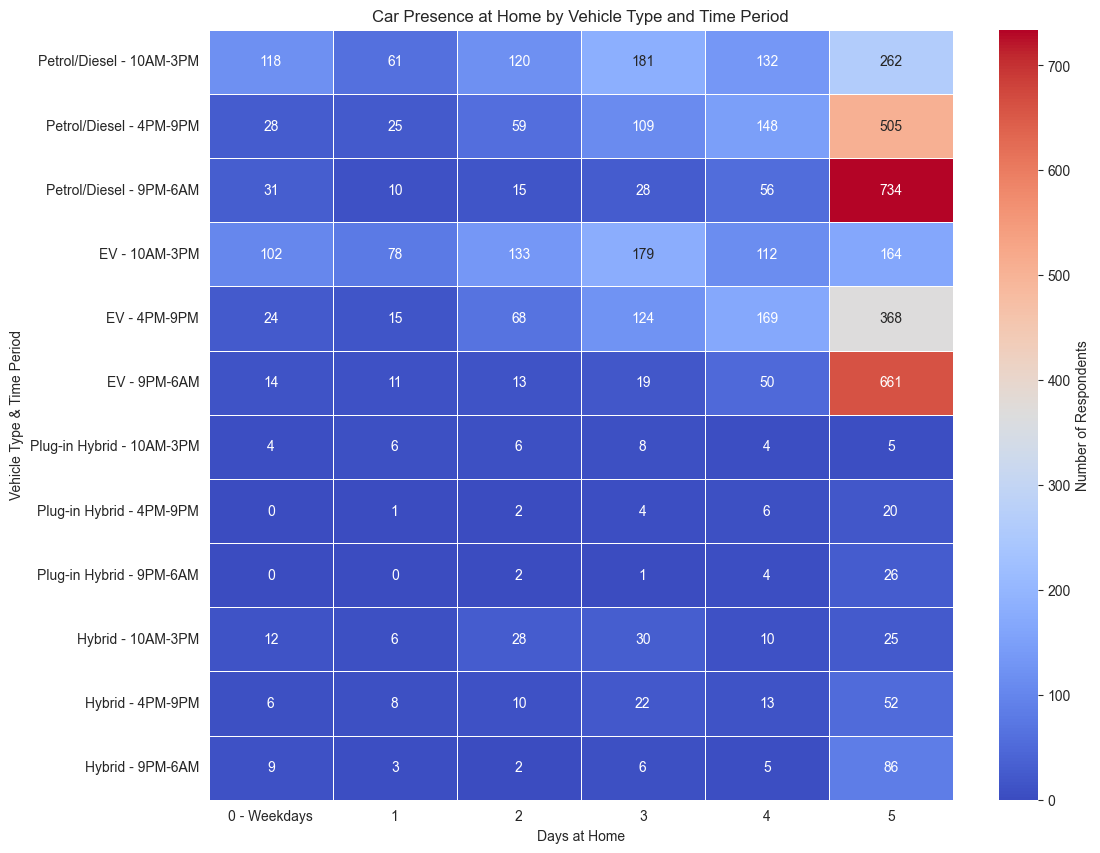

In [22]:
# Define time periods and vehicle types
day_counts = range(6)  # 0 to 5 days

# Prepare heatmap data storage
heatmap_data = []
row_labels = []

# Iterate over each vehicle type and time period
for vehicle_idx, vehicle_label in enumerate(vehicle_types):
    for time_idx, time_label in enumerate(time_periods):
        vehicle_columns = [q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid][vehicle_idx]

        # Drop NaNs before counting
        counts = df[vehicle_columns[time_idx]].dropna().astype(int).value_counts().reindex(day_counts, fill_value=0).values

        # Store heatmap data
        heatmap_data.append(counts)
        row_labels.append(f"{vehicle_label} - {time_label}")  # Proper row label for heatmap

# Convert heatmap data into a DataFrame
heatmap_df = pd.DataFrame(heatmap_data, index=row_labels, columns=["0 - Weekdays", "1", "2", "3", "4", "5"])

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5, cbar_kws={"label": "Number of Respondents"})

plt.title("Car Presence at Home by Vehicle Type and Time Period")
plt.xlabel("Days at Home")
plt.ylabel("Vehicle Type & Time Period")
plt.xticks(rotation=0)  # Keep labels readable
plt.yticks(rotation=0)

plt.show()

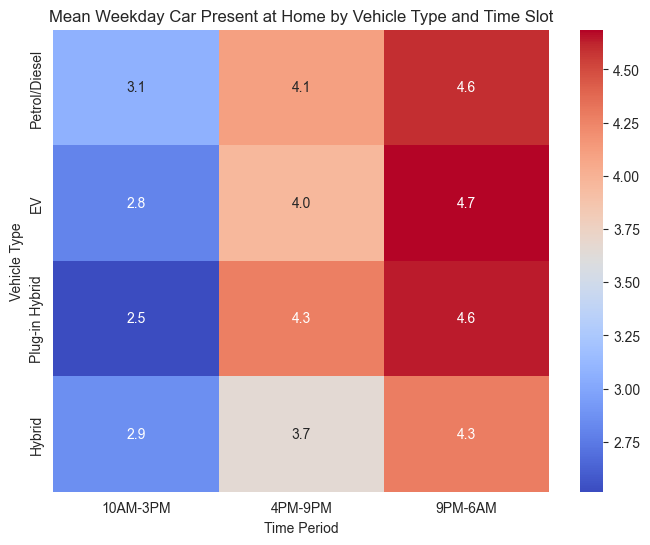

In [23]:
plt.figure(figsize=(8, 6))

# Calculate mean responses (average days home)
heatmap_data = df[q6a_cols].apply(pd.to_numeric, errors='coerce').mean().values.reshape(4,3)

sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f", 
            xticklabels=["10AM-3PM", "4PM-9PM", "9PM-6AM"], 
            yticklabels=["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"])

plt.title("Mean Weekday Car Present at Home by Vehicle Type and Time Slot")
plt.xlabel("Time Period")
plt.ylabel("Vehicle Type")
plt.show()


## 2.4. Attitudes

In [24]:
# Ordered categories for Likert scale
category_order = [
    "Strongly disagree",
    "Somewhat disagree",
    "Neither agree nor disagree",
    "Somewhat agree",
    "Strongly agree"
]

In [25]:
feature_label_map

{'Q1_1': 'Owns Petrol/Diesel Car',
 'Q1_2': 'Owns Electric Vehicle',
 'Q1_3': 'Owns Plug-in Hybrid',
 'Q1_4': 'Owns Hybrid',
 'Q1_99': 'Does Not Own a Car',
 'Q3_1': 'Personal driveway',
 'Q3_2': 'Personal garage',
 'Q3_3': 'Carport',
 'Q3_4': 'Street parking',
 'Q3_5': 'Other parking',
 'Q9': 'How Familiar Are You with V2G?',
 'Q2': 'How Many Kilometres Do You Drive Per Year?',
 'Q8_1': 'Owns Solar Panels',
 'Q8_2': 'Owns Home Battery',
 'Q8_99': 'Owns Neither Solar nor Battery',
 'Q6ax1_1': 'Petrol at home (10am-3pm)',
 'Q6ax1_2': 'Petrol at home (4pm-9pm)',
 'Q6ax1_3': 'Petrol at home (9pm-6am)',
 'Q6ax2_1': 'EV at home (10am-3pm)',
 'Q6ax2_2': 'EV at home (4pm-9pm)',
 'Q6ax2_3': 'EV at home (9pm-6am)',
 'Q6ax3_1': 'Plug-in Hybrid at home (10am-3pm)',
 'Q6ax3_2': 'Plug-in Hybrid at home (4pm-9pm)',
 'Q6ax3_3': 'Plug-in Hybrid at home (9pm-6am)',
 'Q6ax4_1': 'Hybrid at home (10am-3pm)',
 'Q6ax4_2': 'Hybrid at home (4pm-9pm)',
 'Q6ax4_3': 'Hybrid at home (9pm-6am)',
 'Q7_1': 'I check 

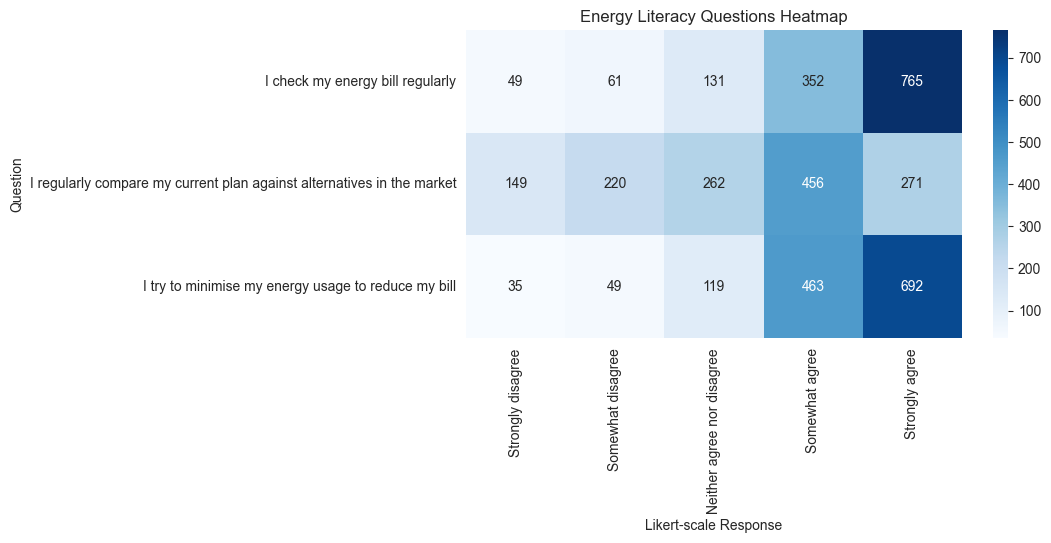

In [26]:
# 1. Subset only relevant columns
df_subset = df[energ_literacy]

# 2. Melt (unpivot) the data
df_melted = df_subset.melt(var_name='Question', value_name='Answer')

# 3. Convert answers to categorical in the specified order
df_melted['Answer'] = pd.Categorical(
    df_melted['Answer'],
    categories=category_order,
    ordered=True
)

# 4. Replace short codes with descriptive labels
df_melted['Question_label'] = df_melted['Question'].replace(feature_label_map)

# 5. Build crosstab using the new Question_label column
freq_table = pd.crosstab(df_melted['Question_label'], df_melted['Answer'])

# 6. Plot the heatmap (row labels will now show the descriptive text)
plt.figure(figsize=(8, 4))
sns.heatmap(freq_table, annot=True, cmap='Blues', fmt='d')
plt.title('Energy Literacy Questions Heatmap')
plt.ylabel('Question')
plt.xlabel('Likert-scale Response')
plt.show()

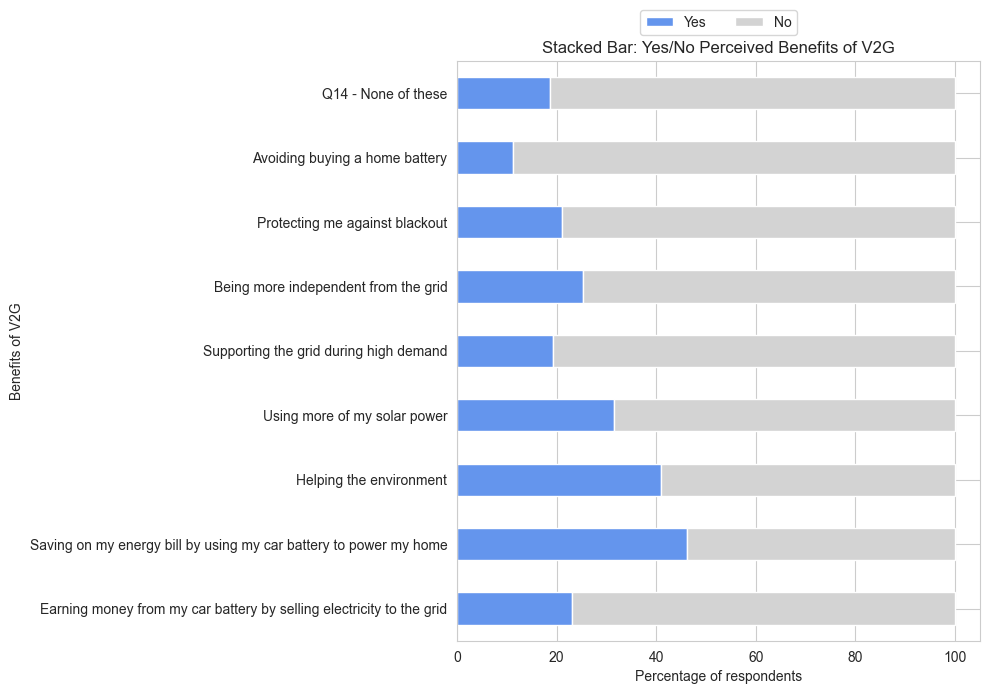

In [27]:
df_subset = df[benefits_v2g].copy()
df_subset = df_subset.replace({"0": 0, "1": 1}).astype(float)

# Calculate %Yes and %No for each column
yes_counts = df_subset.sum()            # number of "1"s per question
no_counts = df_subset.shape[0] - yes_counts  # number of "0"s per question
prop_yes = (yes_counts / df_subset.shape[0]) * 100
prop_no  = (no_counts  / df_subset.shape[0]) * 100

stacked_df = pd.DataFrame({
    "Yes": prop_yes,
    "No": prop_no
})

# Convert question codes to descriptive labels
stacked_df.index = stacked_df.index.to_series().replace(feature_label_map)

# Plot the bars
ax = stacked_df.plot(kind="barh", stacked=True, color=["cornflowerblue", "lightgray"], figsize=(10, 7))

# Move the legend to the top center
ax.legend(
    loc="upper center",        # put the legend on the top center of the axes
    bbox_to_anchor=(0.5, 1.10),# shift the legend box so it's slightly above
    ncol=2                     # show legend items in two columns
)

plt.xlabel("Percentage of respondents")
plt.ylabel("Benefits of V2G")
plt.title("Stacked Bar: Yes/No Perceived Benefits of V2G")
plt.tight_layout()
plt.show()

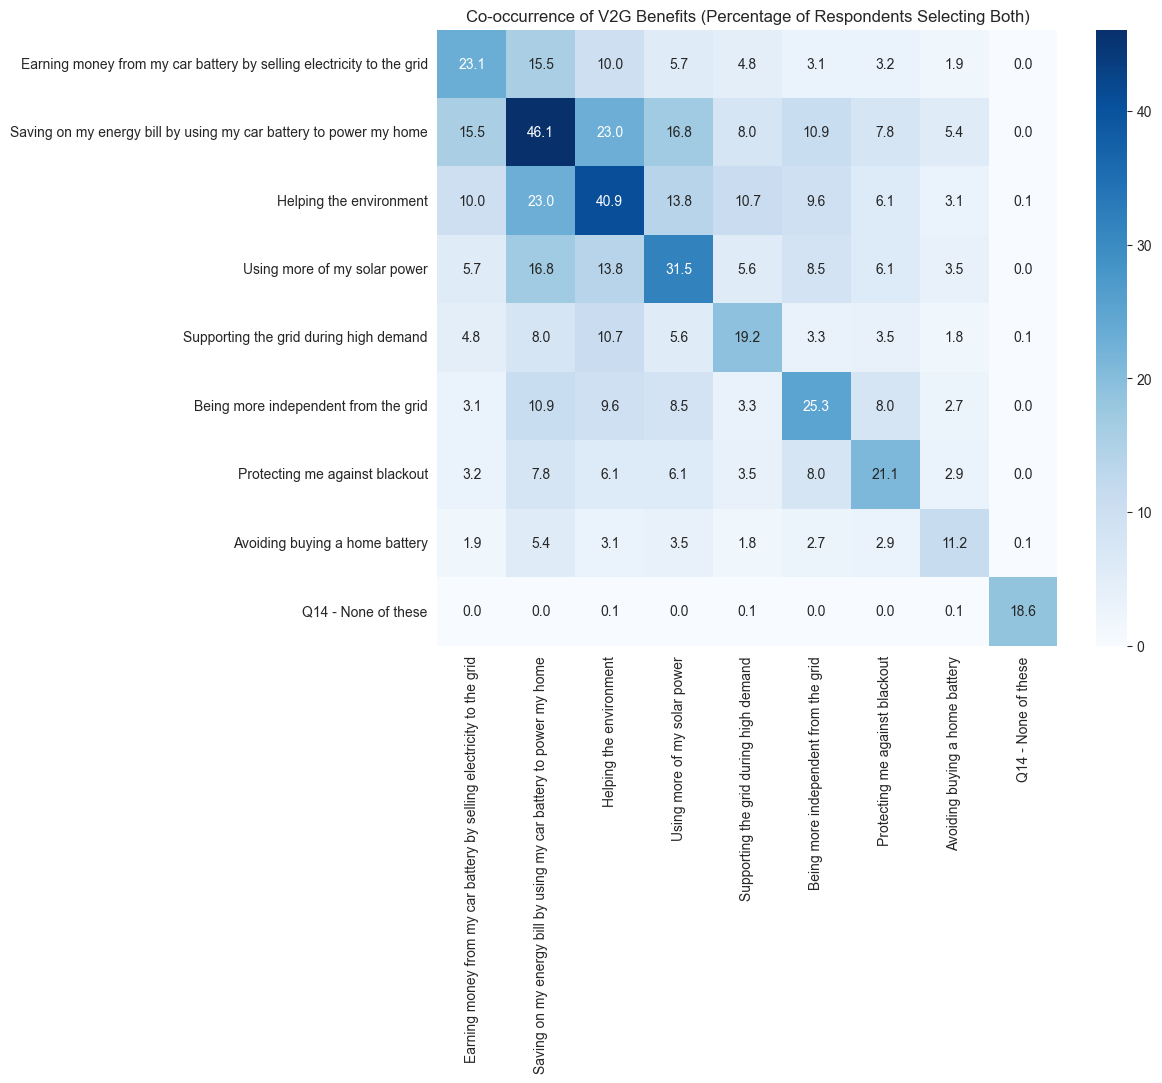

In [28]:
df_subset = df[benefits_v2g].replace({"0": 0, "1": 1}).astype(float)

# co-occurrence = sum of the product across rows => how many '1' in both columns
co_occurrence = df_subset.T.dot(df_subset)

# Convert to fraction or keep as raw count
co_occurrence_frac = co_occurrence / df_subset.shape[0] * 100

# Rename rows & columns to descriptive labels
co_occurrence_frac.index = co_occurrence_frac.index.to_series().replace(feature_label_map)
co_occurrence_frac.columns = co_occurrence_frac.columns.to_series().replace(feature_label_map)

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_frac, annot=True, cmap="Blues", fmt=".1f")
plt.title("Co-occurrence of V2G Benefits (Percentage of Respondents Selecting Both)")
plt.show()

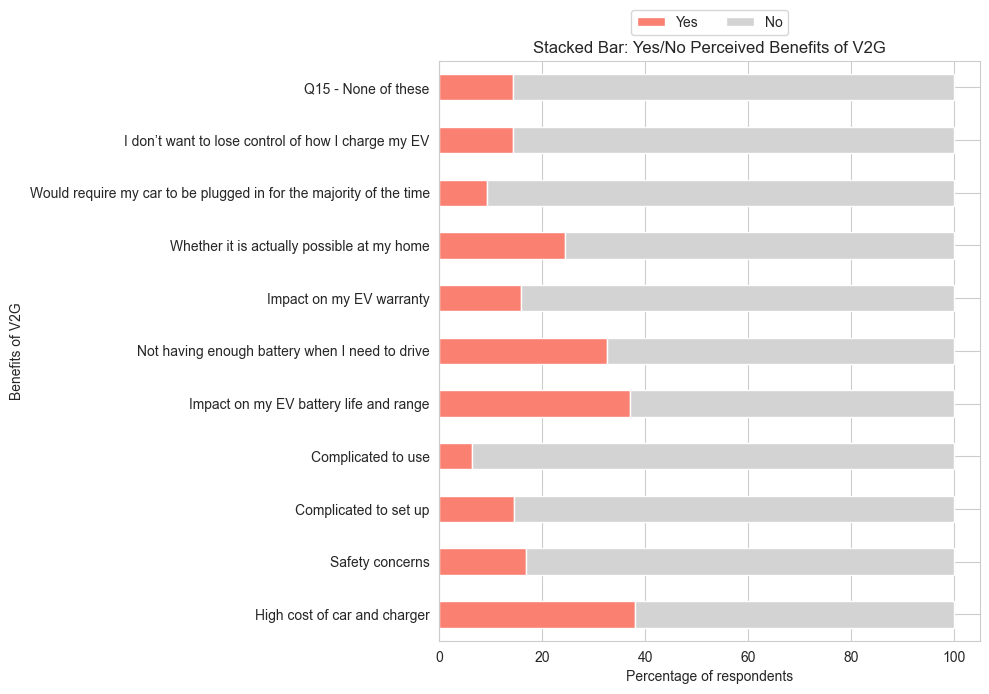

In [29]:
df_subset = df[concerns_v2g].copy()
df_subset = df_subset.replace({"0": 0, "1": 1}).astype(float)

# Calculate %Yes and %No for each column
yes_counts = df_subset.sum()            # number of "1"s per question
no_counts = df_subset.shape[0] - yes_counts  # number of "0"s per question
prop_yes = (yes_counts / df_subset.shape[0]) * 100
prop_no  = (no_counts  / df_subset.shape[0]) * 100

stacked_df = pd.DataFrame({
    "Yes": prop_yes,
    "No": prop_no
})

# Convert question codes to descriptive labels
stacked_df.index = stacked_df.index.to_series().replace(feature_label_map)

# Plot the bars
ax = stacked_df.plot(kind="barh", stacked=True, color=["salmon", "lightgray"], figsize=(10, 7))

# Move the legend to the top center
ax.legend(
    loc="upper center",        # put the legend on the top center of the axes
    bbox_to_anchor=(0.5, 1.10),# shift the legend box so it's slightly above
    ncol=2                     # show legend items in two columns
)

plt.xlabel("Percentage of respondents")
plt.ylabel("Benefits of V2G")
plt.title("Stacked Bar: Yes/No Perceived Benefits of V2G")
plt.tight_layout()
plt.show()

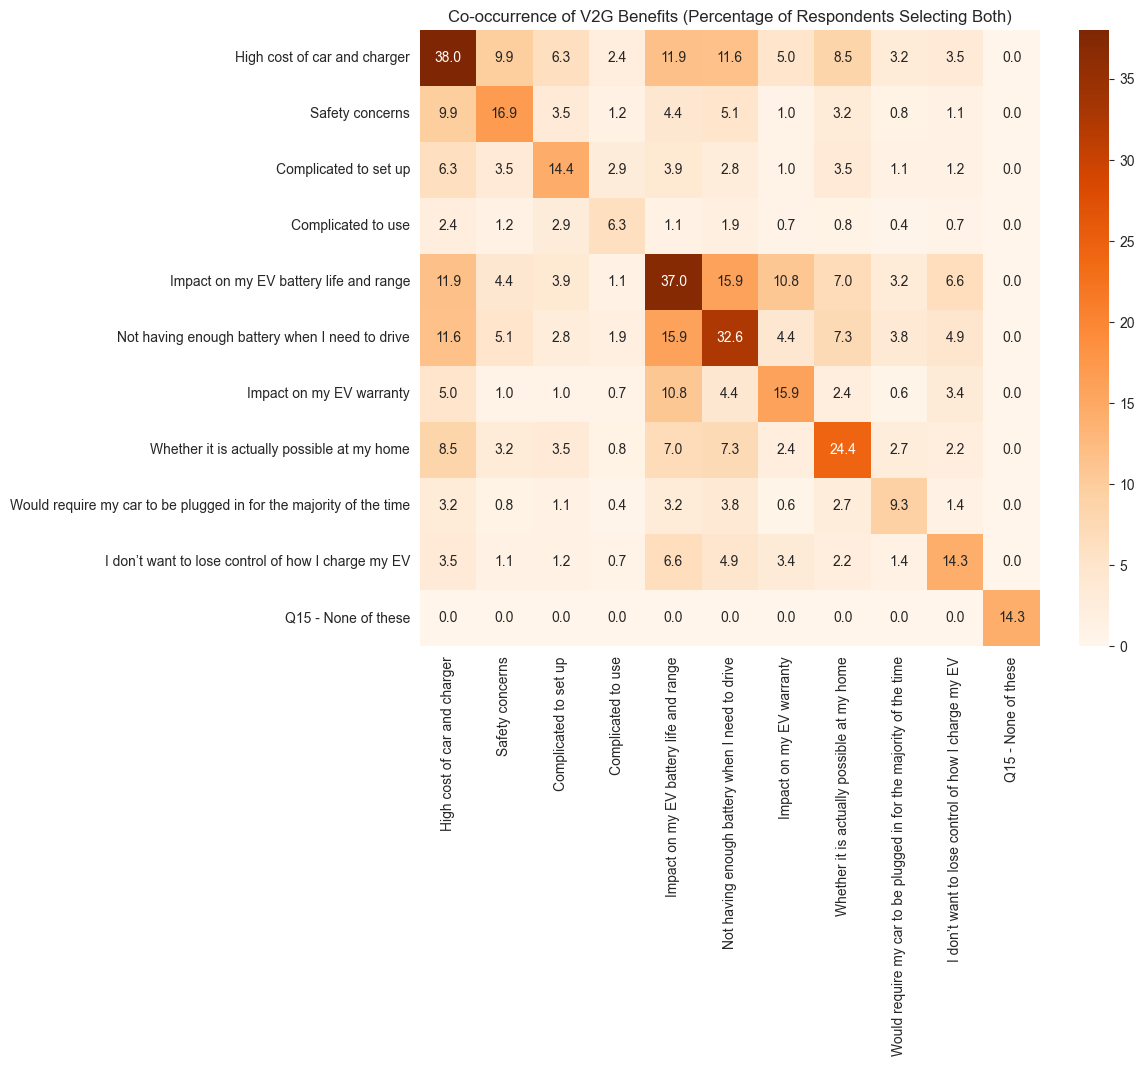

In [86]:
df_subset = df[concerns_v2g].replace({"0": 0, "1": 1}).astype(float)

# co-occurrence = sum of the product across rows => how many '1' in both columns
co_occurrence = df_subset.T.dot(df_subset)

# Convert to fraction or keep as raw count
co_occurrence_frac = co_occurrence / df_subset.shape[0] * 100

# Rename rows & columns to descriptive labels
co_occurrence_frac.index = co_occurrence_frac.index.to_series().replace(feature_label_map)
co_occurrence_frac.columns = co_occurrence_frac.columns.to_series().replace(feature_label_map)

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_frac, annot=True, cmap="Oranges", fmt=".1f")
plt.title("Co-occurrence of V2G Benefits (Percentage of Respondents Selecting Both)")
plt.show()

### 2.5.2. Attitudes next to each other

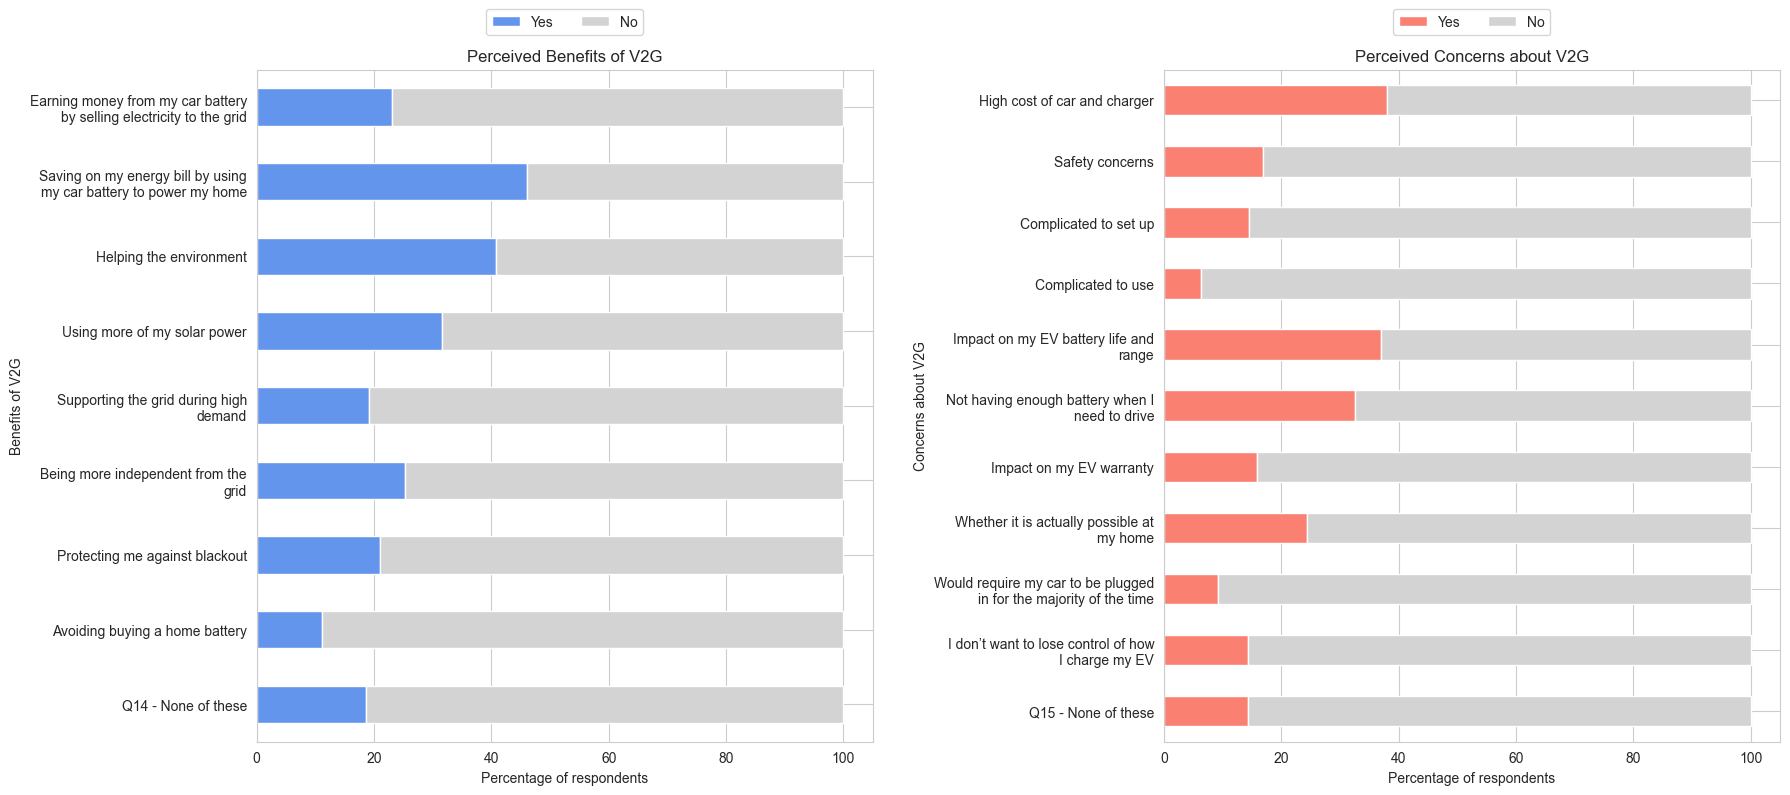

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# ---- Utility function to wrap long labels ----
def wrap_labels(label, width=35):
    return '\n'.join(textwrap.wrap(label, width=width))

# ---- Prepare Benefits Data ----
df_benefits = df[benefits_v2g].copy().replace({"0": 0, "1": 1}).astype(float)
yes_benefits = df_benefits.sum()
no_benefits = df_benefits.shape[0] - yes_benefits
prop_yes_benefits = (yes_benefits / df_benefits.shape[0]) * 100
prop_no_benefits  = (no_benefits  / df_benefits.shape[0]) * 100

stacked_benefits = pd.DataFrame({
    "Yes": prop_yes_benefits,
    "No": prop_no_benefits
})

# Replace codes with descriptive labels and wrap text
stacked_benefits.index = (
    stacked_benefits.index.to_series()
    .replace(feature_label_map)
    .map(lambda x: wrap_labels(x, width=35))
)

# ---- Prepare Concerns Data ----
df_concerns = df[concerns_v2g].copy().replace({"0": 0, "1": 1}).astype(float)
yes_concerns = df_concerns.sum()
no_concerns = df_concerns.shape[0] - yes_concerns
prop_yes_concerns = (yes_concerns / df_concerns.shape[0]) * 100
prop_no_concerns  = (no_concerns  / df_concerns.shape[0]) * 100

stacked_concerns = pd.DataFrame({
    "Yes": prop_yes_concerns,
    "No": prop_no_concerns
})

# Replace codes with descriptive labels and wrap text
stacked_concerns.index = (
    stacked_concerns.index.to_series()
    .replace(feature_label_map)
    .map(lambda x: wrap_labels(x, width=35))
)

# ---- Plotting side-by-side ----
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True)

# Benefits subplot
stacked_benefits.plot(
    kind="barh", stacked=True, color=["cornflowerblue", "lightgray"], ax=axs[0]
)
axs[0].set_xlabel("Percentage of respondents")
axs[0].set_ylabel("Benefits of V2G")
axs[0].set_title("Perceived Benefits of V2G")
axs[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.10), ncol=2)
axs[0].invert_yaxis()  # optional: matches "first item on top"

# Concerns subplot
stacked_concerns.plot(
    kind="barh", stacked=True, color=["salmon", "lightgray"], ax=axs[1]
)
axs[1].set_xlabel("Percentage of respondents")
axs[1].set_ylabel("Concerns about V2G")
axs[1].set_title("Perceived Concerns about V2G")
axs[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.10), ncol=2)
axs[1].invert_yaxis()  # optional

plt.tight_layout(w_pad=3)
plt.show()


# 3. Descriptive per demographic

## 3.1. Filtering Demographic

In [87]:

def filter_dataframe_by_demographics(df, region=None, age_band=None, gender=None, colour_plus=None, Q21=None, Q22=None, Q24=None):
    """
    Filters the input DataFrame based on specified demographic criteria.

    Args:
        df (pd.DataFrame): The DataFrame to filter.
        region (str or list, optional): Filter by region. Can be a single region name (str) 
                                        or a list of region names. Defaults to None.
        age_band (str or list, optional): Filter by age band. Can be a single age band (str) 
                                          or a list of age bands. Defaults to None.
        gender (str or list, optional): Filter by gender. Can be a single gender (str) 
                                        or a list of genders. Defaults to None.
        colour_plusregion (str or list, optional): Filter by 'colour_plusregion' column.
        Q21 (str or list, optional): Filter by 'Q21' column (Housing type).
        Q22 (str or list, optional): Filter by 'Q22' column (Housing ownership).
        Q24 (str or list, optional): Filter by 'Q24' column (Income band).

    Returns:
        pd.DataFrame: A new DataFrame filtered based on the provided criteria. 
                      Returns the original DataFrame if no filters are applied or 
                      if filter columns are not found.
    """

    # Starting with a copy to avoid modifying the original DataFrame
    filtered_df = df.copy() 

    # Initializing filter condition to keep all rows
    filter_conditions = pd.Series(True, index=df.index) 

    if region is not None:
        if isinstance(region, str):
            filter_conditions = filter_conditions & (filtered_df['region'] == region)
        elif isinstance(region, list):
            filter_conditions = filter_conditions & (filtered_df['region'].isin(region))
        else:
            print("Warning: 'region' filter should be a string or a list of strings.")

    if age_band is not None:
        if isinstance(age_band, str):
            filter_conditions = filter_conditions & (filtered_df['AgeBand'] == age_band)
        elif isinstance(age_band, list):
            filter_conditions = filter_conditions & (filtered_df['AgeBand'].isin(age_band))
        else:
            print("Warning: 'age_band' filter should be a string or a list of strings.")

    if gender is not None:
        if isinstance(gender, str):
            filter_conditions = filter_conditions & (filtered_df['gender'] == gender)
        elif isinstance(gender, list):
            filter_conditions = filter_conditions & (filtered_df['gender'].isin(gender))
        else:
            print("Warning: 'gender' filter should be a string or a list of strings.")

    if colour_plus is not None:
        if isinstance(colour_plus, str):
            filter_conditions = filter_conditions & (filtered_df['colour_plus'] == colour_plus)
        elif isinstance(colour_plus, list):
            filter_conditions = filter_conditions & (filtered_df['colour_plus'].isin(colour_plus))
        else:
            print("Warning: 'colour_plus' filter should be a string or a list of strings.")

    if Q21 is not None:
        if isinstance(Q21, str):
            filter_conditions = filter_conditions & (filtered_df['Q21'] == Q21)
        elif isinstance(Q21, list):
            filter_conditions = filter_conditions & (filtered_df['Q21'].isin(Q21))
        else:
            print("Warning: 'Q21' filter should be a string or a list of strings.")

    if Q22 is not None:
        if isinstance(Q22, str):
            filter_conditions = filter_conditions & (filtered_df['Q22'] == Q22)
        elif isinstance(Q22, list):
            filter_conditions = filter_conditions & (filtered_df['Q22'].isin(Q22))
        else:
            print("Warning: 'Q22' filter should be a string or a list of strings.")

    if Q24 is not None:
        if isinstance(Q24, str):
            filter_conditions = filter_conditions & (filtered_df['Q24'] == Q24)
        elif isinstance(Q24, list):
            filter_conditions = filter_conditions & (filtered_df['Q24'].isin(Q24))
        else:
            print("Warning: 'Q24' filter should be a string or a list of strings.")


    return filtered_df[filter_conditions]

In [88]:
# Example 1: Filter for Metropolitan region
filtered_df_metro = filter_dataframe_by_demographics(df, region='METROPOLITAN')
print(f"Shape of DataFrame filtered by Metropolitan region: {filtered_df_metro.shape}")

Shape of DataFrame filtered by Metropolitan region: (478, 57)


In [89]:
filtered_df_metro

,Q6ax1_1,Q6ax1_2,Q6ax1_3,Q6ax2_1,Q6ax2_2,Q6ax2_3,Q6ax3_1,Q6ax3_2,Q6ax3_3,Q6ax4_1,...,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_99,Q17_1,Q17_2,Q17_3,Q18
0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,2,3,1,Discharge to my home AND discharge to the grid...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,0,3,1,2,"Discharge to my home only, to reduce my energy..."
7,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,2,3,None of these
11,NaN,NaN,NaN,3.0,4.0,5.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,1,2,3,Discharge to my home AND discharge to the grid...
12,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,NaN,NaN,NaN,3.0,4.0,5.0,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,1,2,3,Discharge to my home AND discharge to the grid...
1346,NaN,NaN,NaN,0.0,1.0,5.0,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,2,1,3,Discharge to my home AND discharge to the grid...
1348,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,2,3,1,Discharge to my home AND discharge to the grid...
1350,2.0,4.0,5.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,...,1,0,1,0,0,0,1,2,3,"Discharge to my home only, to reduce my energy..."


In [90]:
# Example 2: Filter for Metropolitan or Rural regions
filtered_df_metro_rural = filter_dataframe_by_demographics(df, region=['METROPOLITAN', 'RURAL'])
print(f"Shape of DataFrame filtered by Metropolitan or Rural region: {filtered_df_metro_rural.shape}")

# Example 3: Filter for Metropolitan region AND age band '55-64 years'
filtered_df_metro_age = filter_dataframe_by_demographics(df, region='METROPOLITAN', age_band='55-64 years')
print(f"Shape of DataFrame filtered by Metropolitan region AND age band '55-64 years': {filtered_df_metro_age.shape}")

# Example 4: Filter by income band
filtered_df_income = filter_dataframe_by_demographics(df, Q24='$2000-3000 a week / $104,000-$156,000 a year')
print(f"Shape of DataFrame filtered by income band '$2000-3000 a week / $104,000-$156,000 a year': {filtered_df_income.shape}")

# Example 5: Filter by multiple genders (although in this dataset, 'gender' might have limited unique values)
filtered_df_gender = filter_dataframe_by_demographics(df, gender=['Male', 'Female']) # Assuming 'Male' and 'Female' are possible values
print(f"Shape of DataFrame filtered by gender Male or Female: {filtered_df_gender.shape}")

# Example 6: No filter applied (returns original DataFrame)
filtered_df_no_filter = filter_dataframe_by_demographics(df)
print(f"Shape of DataFrame with no filter applied: {filtered_df_no_filter.shape}")
print(f"Shape of Original DataFrame: {df.shape}")

Shape of DataFrame filtered by Metropolitan or Rural region: (729, 57)
Shape of DataFrame filtered by Metropolitan region AND age band '55-64 years': (110, 57)
Shape of DataFrame filtered by income band '$2000-3000 a week / $104,000-$156,000 a year': (206, 57)
Shape of DataFrame filtered by gender Male or Female: (1218, 57)
Shape of DataFrame with no filter applied: (1358, 57)
Shape of Original DataFrame: (1358, 57)


In [91]:
vehicle_types = ["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"]
time_periods = ["10am-3pm", "4pm-9pm", "9pm-6am"]
counts_dict = {v: [] for v in vehicle_types}

In [92]:
heatmap_data = np.array([counts_dict[v] for v in vehicle_types]) # Reset heatmap_data if needed if you are re-running cells.


In [93]:
def create_heatmap_data(filtered_df, vehicle_types, q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid):
    """
    Generates heatmap data from survey DataFrame based on vehicle types and time periods.

    Args:
        filtered_df (pd.DataFrame): DataFrame containing the survey data.
        vehicle_types (list): List of vehicle type labels (e.g., ['Petrol', 'EV', 'PlugHyb', 'Hybrid']).
        q6a_petrol (list): List of column names for petrol/diesel vehicles across time periods.
        q6a_ev (list): List of column names for electric vehicles across time periods.
        q6a_plughyb (list): List of column names for plug-in hybrid vehicles across time periods.
        q6a_hybrid (list): List of column names for hybrid vehicles across time periods.

    Returns:
        np.ndarray: A numpy array representing the heatmap data. Rows are vehicle types, columns are time periods,
                      and each cell contains an array of counts for rating values (0-5).
                      The shape of the output array will be (len(vehicle_types), 3, 6), where 3 is the number of time periods,
                      and 6 is the number of rating categories (0 to 5).
    """
    counts_dict = {v: [] for v in vehicle_types} # Initialize counts_dict

    # Combine all q6a columns for preprocessing
    q6a_cols = q6a_petrol + q6a_ev + q6a_plughyb + q6a_hybrid

    # Preprocess columns: replace "0 - Weekdays" with 0 and convert to numeric
    for col in q6a_cols:
        if col in filtered_df.columns: # Check if column exists in DataFrame to avoid errors
            filtered_df[col] = filtered_df[col].replace("0 - Weekdays", 0)
            filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')

    for time_idx in range(3):
        for vehicle_idx, vehicle_label in enumerate(vehicle_types):
            vehicle_columns = [q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid][vehicle_idx]
            current_column = vehicle_columns[time_idx]
            if current_column in filtered_df.columns: # Check if column exists before processing
                counts = filtered_df[current_column].dropna().astype(int).value_counts().reindex(range(6), fill_value=0).values
                counts_dict[vehicle_label].append(counts)
            else:
                counts_dict[vehicle_label].append(np.zeros(6)) # Append zeros if column not found, maintaining shape

    heatmap_data = np.array([counts_dict[v] for v in vehicle_types])
    return heatmap_data

In [94]:
create_heatmap_data(filtered_df_metro, vehicle_types, q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid)

array([[[ 45,  22,  55,  72,  42,  75],
        [ 12,  10,  35,  43,  58, 153],
        [ 15,   5,   9,  13,  25, 244]],

       [[ 28,  29,  58,  47,  29,  57],
        [  7,   6,  27,  46,  53, 109],
        [  6,   5,   6,   8,  27, 196]],

       [[  2,   1,   3,   2,   1,   1],
        [  0,   0,   0,   1,   2,   7],
        [  0,   0,   0,   0,   2,   8]],

       [[  7,   0,  13,  17,   5,  10],
        [  3,   2,   7,  13,   5,  22],
        [  3,   1,   2,   6,   2,  38]]], dtype=int64)

In [95]:
def plot_heatmaps(heatmap_data, vehicle_types, time_periods, filter_applied=None):
    """
    Generates and displays heatmap plots for each time period from heatmap data.

    Args:
        heatmap_data (np.ndarray): Heatmap data array.
                                    Shape should be (n_vehicle_types, n_time_periods, n_rating_categories).
        vehicle_types (list): List of vehicle type labels for y-axis ticks.
        time_periods (list): List of time period labels for plot titles.

    Returns:
        None: The function displays the heatmaps and does not explicitly return a value.
    """

    day_labels = ["0 days", "1 day", "2 days", "3 days", "4 days", "5 days"] # Define day labels here

    for i, time_period in enumerate(time_periods):
        plt.figure(figsize=(8, 6))
        sns.heatmap(heatmap_data[:, i, :], annot=True, cmap="crest", fmt="d",
                    xticklabels=day_labels,
                    yticklabels=vehicle_types)
        plt.title(f"Count of Responses for {time_period} (Filtered by {filter_applied})")
        plt.xlabel("Days at Home")
        plt.ylabel("Vehicle Type")
        plt.show()

In [96]:
plot_heatmaps(heatmap_data, vehicle_types, time_periods, filter_applied='Metropolitan region')

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 800x600 with 0 Axes>

# 4. Comparative

In [97]:
def compare_regions_distribution(df, q6a_cols, q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid, vehicle_types, time_periods):
    """
    Loops through unique regions in the DataFrame and generates heatmap distributions 
    for each region to compare vehicle parking times at home.

    Args:
        df (pd.DataFrame): The input DataFrame.
        q6a_cols (list): List of column names related to Q6a questions.
        q6a_petrol (list): List of column names for petrol/diesel vehicles.
        q6a_ev (list): List of column names for electric vehicles.
        q6a_plughyb (list): List of column names for plug-in hybrid vehicles.
        q6a_hybrid (list): List of column names for hybrid vehicles.
        vehicle_types (list): List of vehicle type labels for heatmap y-axis.
        time_periods (list): List of time period labels for heatmap titles.
    """

    # Extract unique regions from 'region' column
    unique_regions = df['region'].str.split(r'([A-Z]+)$', expand=True)[1].dropna().unique()
    print(f"Unique regions found: {unique_regions}")

    for region in unique_regions:
        print(f"\nAnalyzing region: {region}")

        # Filter DataFrame for the current region
        filtered_df_region = filter_dataframe_by_demographics(df, region=region)
        print(f"Shape of DataFrame for {region} region: {filtered_df_region.shape}")

        if filtered_df_region.empty:
            print(f"No data available for region: {region}. Skipping heatmap.")
            continue # Skip to the next region if no data

        # Prepare data for heatmap (reusing your original heatmap code)
        counts_dict = {v: [] for v in vehicle_types}

        for col in q6a_cols:
            filtered_df_region[col] = filtered_df_region[col].replace("0 - Weekdays", 0)
            filtered_df_region[col] = pd.to_numeric(filtered_df_region[col], errors='coerce')

        heatmap_data = np.array([counts_dict[v] for v in vehicle_types]) # Resetting heatmap_data might be needed if you re-run cells multiple times.

        for time_idx in range(3):  # Three time periods
            for vehicle_idx, vehicle_label in enumerate(vehicle_types):
                vehicle_columns = [q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid][vehicle_idx]
                counts = filtered_df_region[vehicle_columns[time_idx]].dropna().astype(int).value_counts().reindex(range(6), fill_value=0).values
                counts_dict[vehicle_label].append(counts)

        heatmap_data = np.array([counts_dict[v] for v in vehicle_types])

        # Plot heatmap for each time period for the current region
        for i, time_period in enumerate(time_periods):
            plt.figure(figsize=(8, 6))
            sns.heatmap(heatmap_data[:, i, :], annot=True, cmap="crest", fmt="d",
                        xticklabels=["0 days", "1 day", "2 days", "3 days", "4 days", "5 days"],
                        yticklabels=vehicle_types)
            plt.title(f"Region: {region} - Count of Responses for {time_period}")
            plt.xlabel("Days at Home")
            plt.ylabel("Vehicle Type")
            plt.show()


Unique regions found: ['METROPOLITAN' 'RURAL' 'INTERSTATE' 'REGIONAL' 'UNKNOWN']

Analyzing region: METROPOLITAN
Shape of DataFrame for METROPOLITAN region: (478, 57)


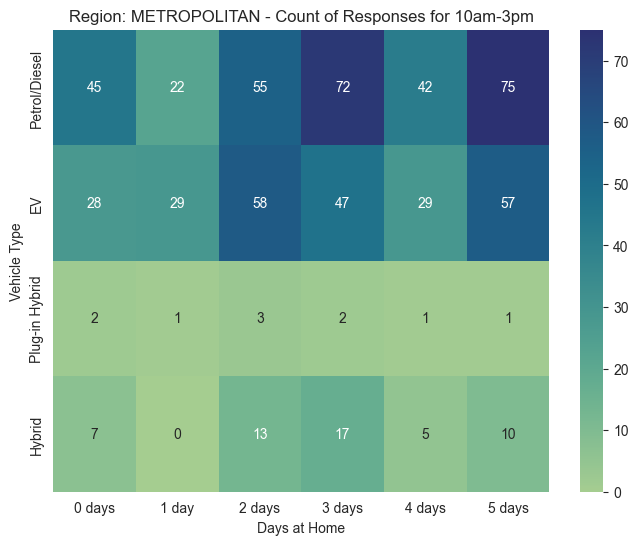

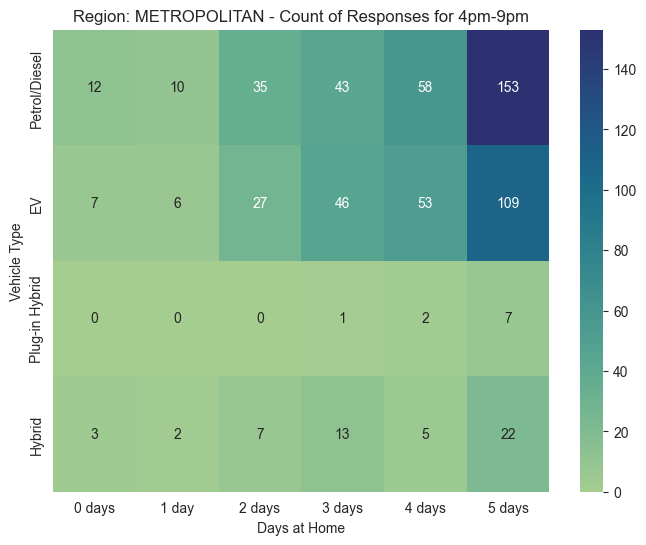

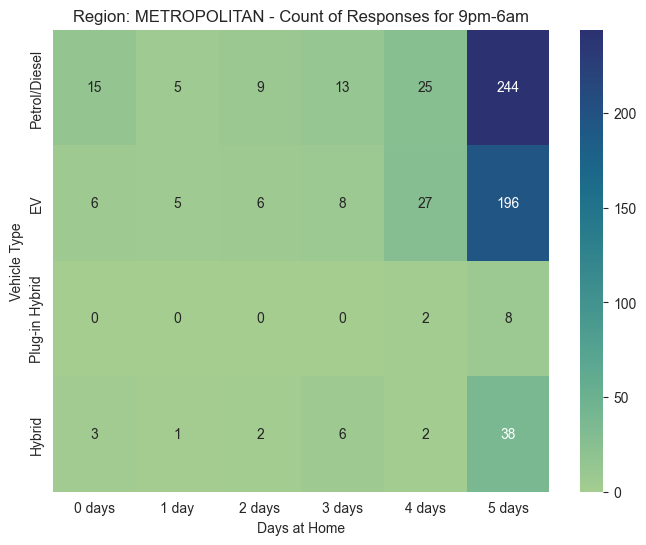


Analyzing region: RURAL
Shape of DataFrame for RURAL region: (251, 57)


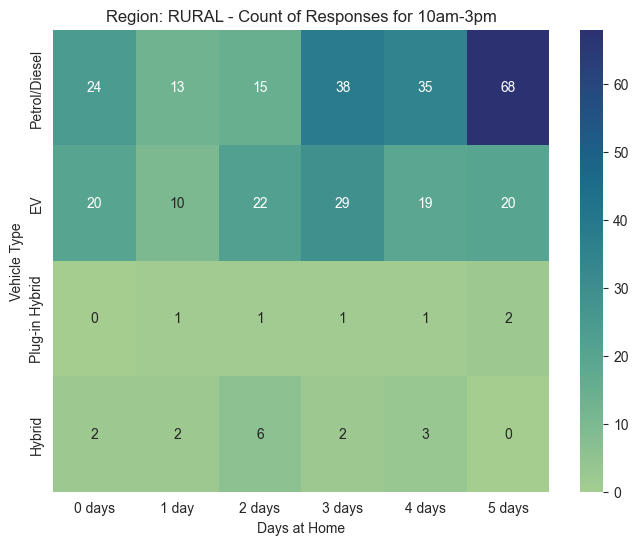

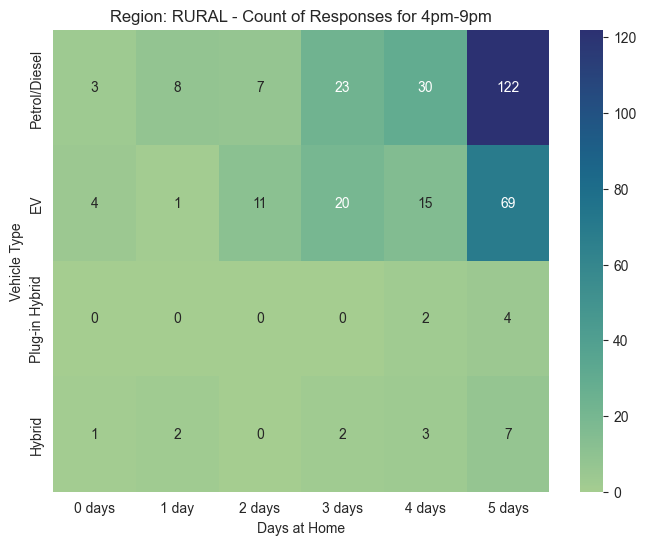

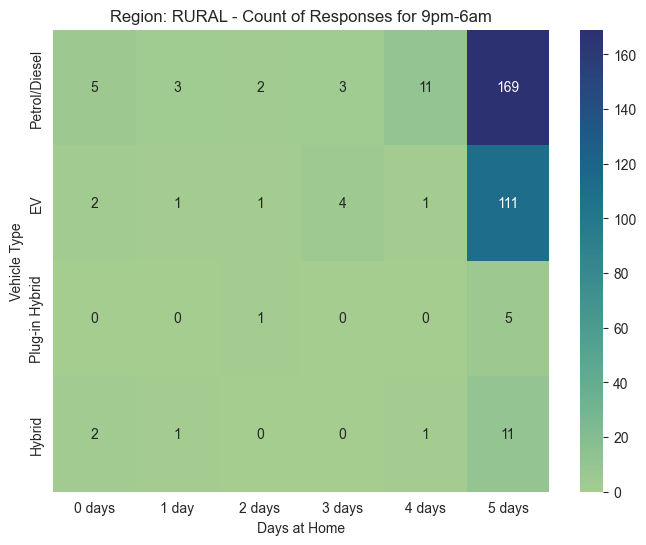


Analyzing region: INTERSTATE
Shape of DataFrame for INTERSTATE region: (221, 57)


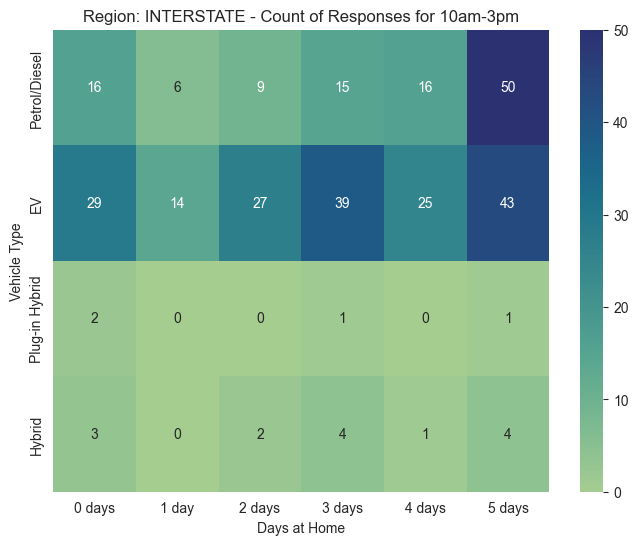

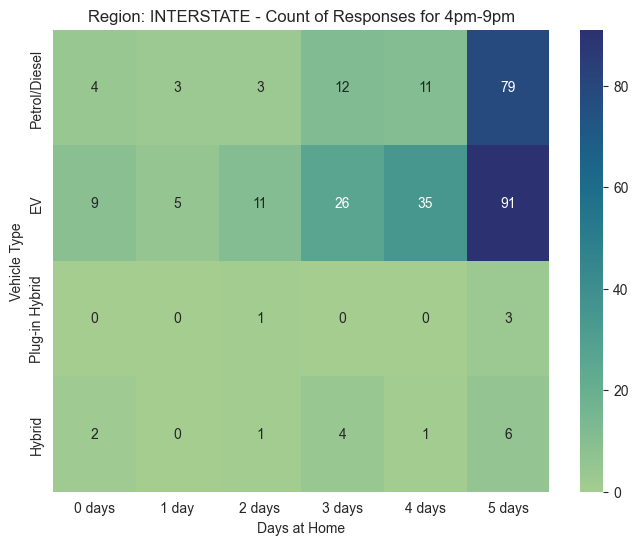

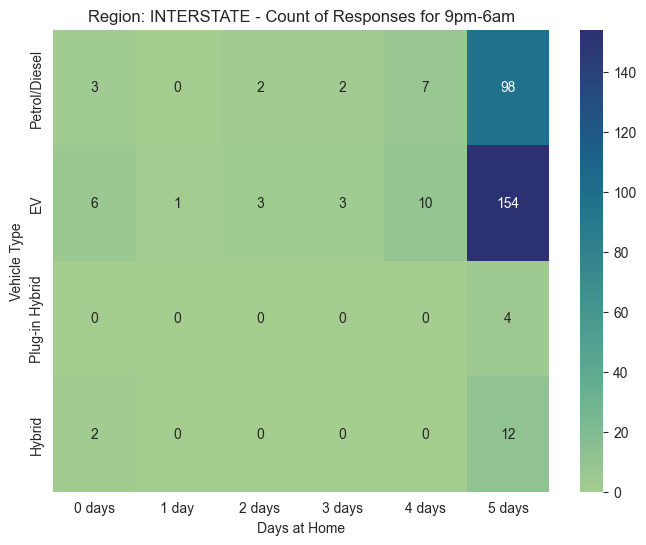


Analyzing region: REGIONAL
Shape of DataFrame for REGIONAL region: (403, 57)


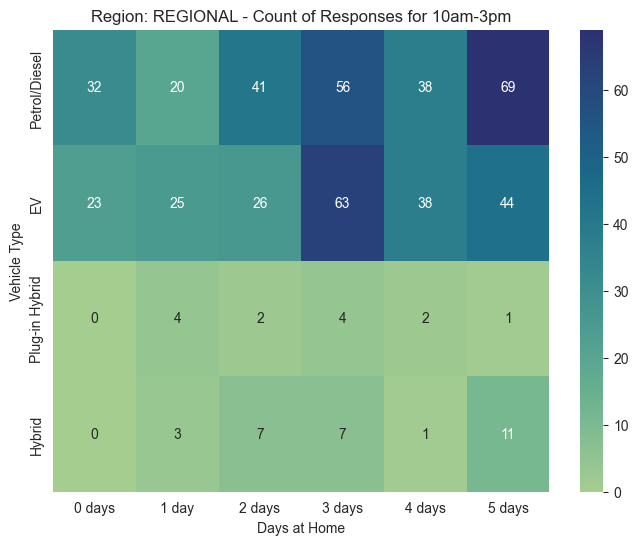

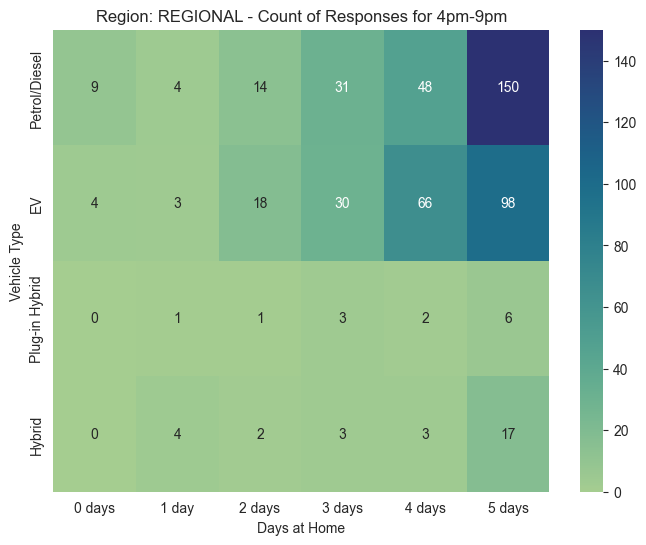

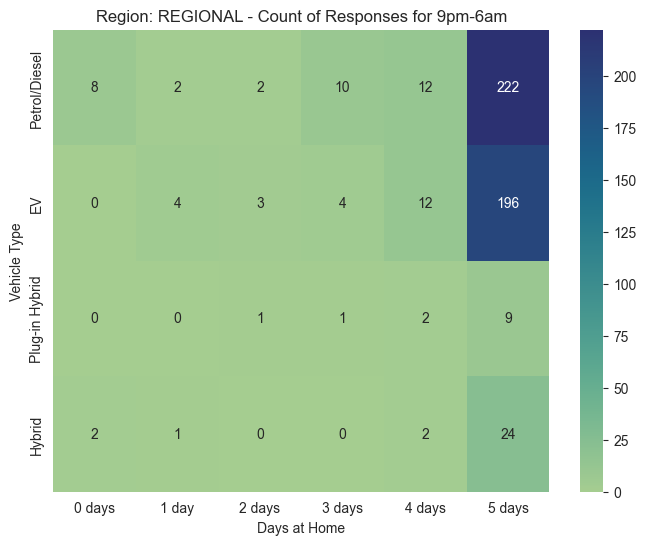


Analyzing region: UNKNOWN
Shape of DataFrame for UNKNOWN region: (5, 57)


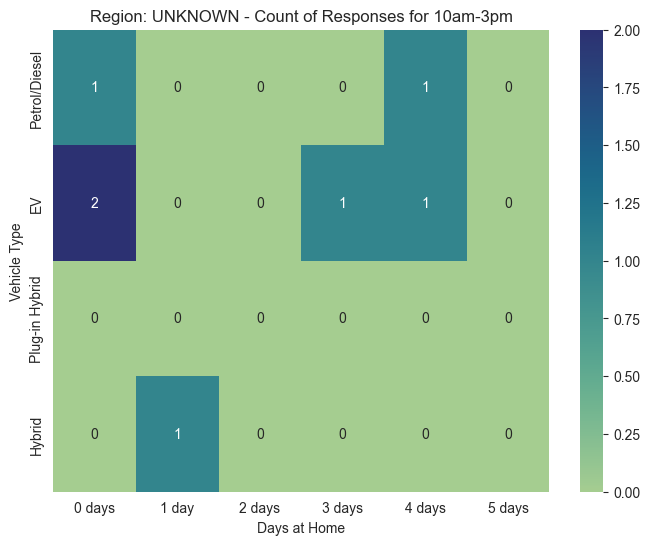

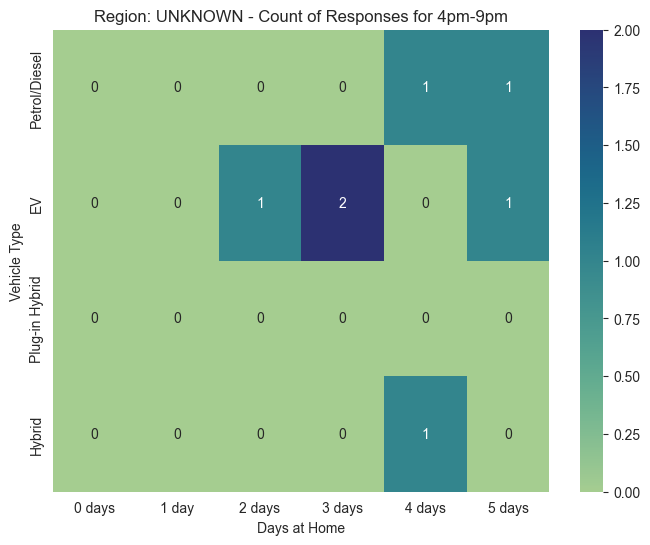

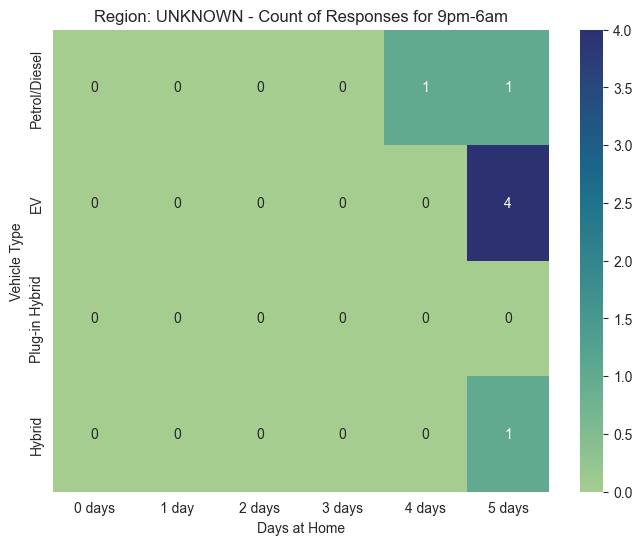

In [98]:

vehicle_types = ["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"]
time_periods = ["10am-3pm", "4pm-9pm", "9pm-6am"]

q6a_petrol = ["Q6ax1_1","Q6ax1_2","Q6ax1_3"]
q6a_ev     = ["Q6ax2_1","Q6ax2_2","Q6ax2_3"]
q6a_plughyb= ["Q6ax3_1","Q6ax3_2","Q6ax3_3"]
q6a_hybrid = ["Q6ax4_1","Q6ax4_2","Q6ax4_3"]
q6a_cols = q6a_petrol + q6a_ev + q6a_plughyb + q6a_hybrid


# Call the function to compare regions
compare_regions_distribution(df, q6a_cols, q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid, vehicle_types, time_periods)

Unique regions found: ['METROPOLITAN' 'RURAL' 'INTERSTATE' 'REGIONAL' 'UNKNOWN']

Analyzing region: METROPOLITAN

Analyzing region: RURAL

Analyzing region: INTERSTATE

Analyzing region: REGIONAL

Analyzing region: UNKNOWN


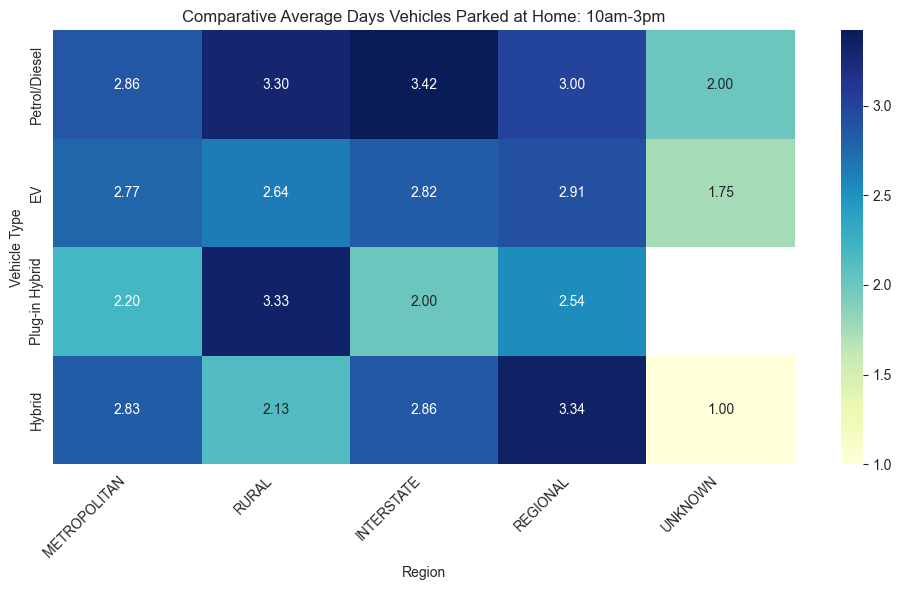

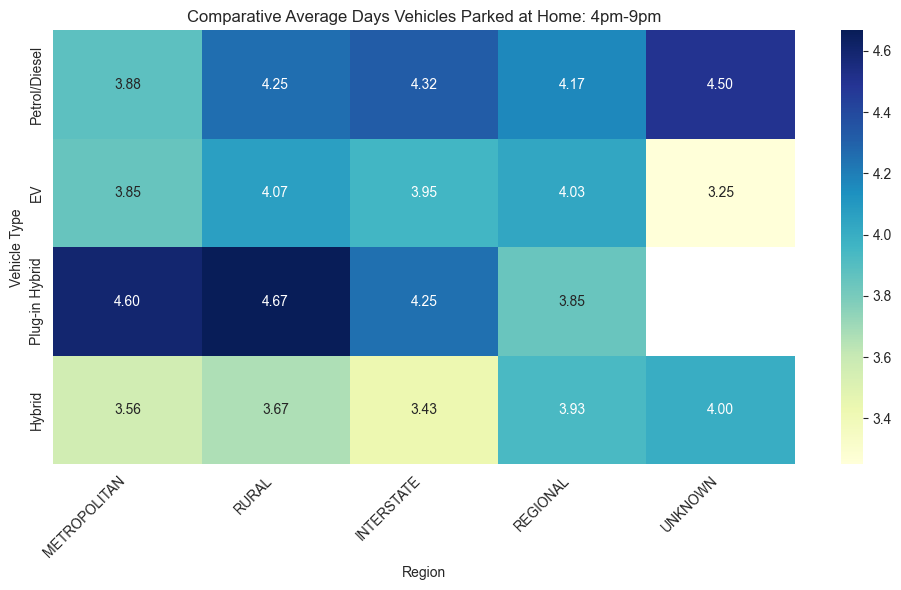

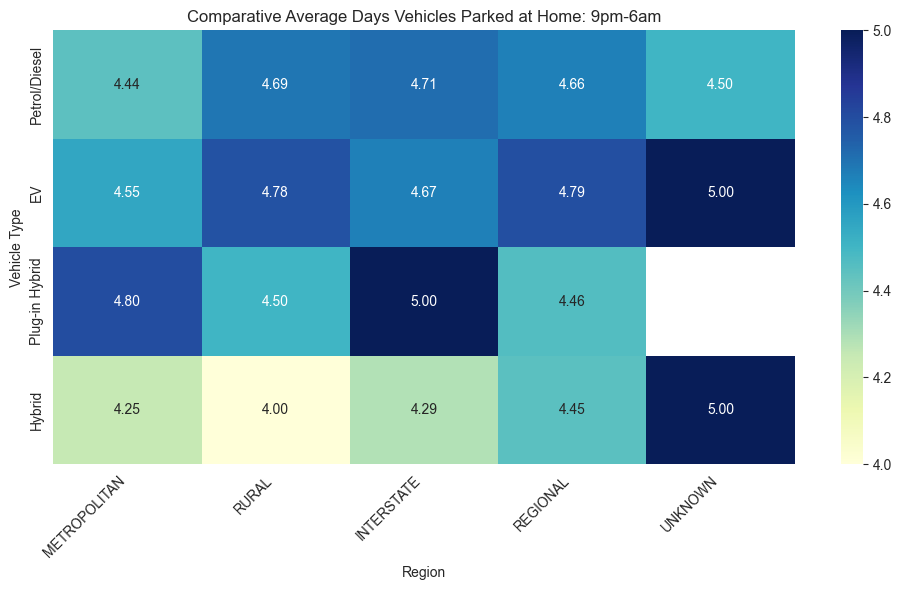

In [99]:
def compare_regions_heatmap_comparative(df, q6a_cols, q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid, vehicle_types, time_periods):
    """
    Generates comparative heatmaps across regions in a single plot for each time period,
    showing the average number of days vehicles are parked at home.

    Args:
        df (pd.DataFrame): The input DataFrame.
        q6a_cols (list): List of column names related to Q6a questions.
        q6a_petrol (list): List of column names for petrol/diesel vehicles.
        q6a_ev (list): List of column names for electric vehicles.
        q6a_plughyb (list): List of column names for plug-in hybrid vehicles.
        q6a_hybrid (list): List of column names for hybrid vehicles.
        vehicle_types (list): List of vehicle type labels for heatmap y-axis.
        time_periods (list): List of time period labels for heatmap titles.
    """

    unique_regions = df['region'].dropna().unique()
    print(f"Unique regions found: {unique_regions}")

    # Initialize a dictionary to store average days data for each region and time period
    avg_days_data_all_regions = {time_period: [] for time_period in time_periods}

    for region in unique_regions:
        print(f"\nAnalyzing region: {region}")
        filtered_df_region = filter_dataframe_by_demographics(df, region=region)

        if filtered_df_region.empty:
            print(f"No data available for region: {region}. Skipping average days calculation.")
            for time_period in time_periods:
                avg_days_data_all_regions[time_period].append([np.nan] * len(vehicle_types)) # Append NaNs for empty region
            continue # Skip to the next region


        counts_dict = {v: [] for v in vehicle_types}

        for col in q6a_cols:
            filtered_df_region[col] = filtered_df_region[col].replace("0 - Weekdays", 0)
            filtered_df_region[col] = pd.to_numeric(filtered_df_region[col], errors='coerce')


        region_avg_days_for_time_periods = {time_period: [] for time_period in time_periods} # Store avg days for this region

        for time_idx, time_period in enumerate(time_periods):
            avg_days_for_vehicle_types = []
            for vehicle_idx, vehicle_label in enumerate(vehicle_types):
                vehicle_columns = [q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid][vehicle_idx]
                col_data = filtered_df_region[vehicle_columns[time_idx]].dropna().astype(int)
                counts = col_data.value_counts().reindex(range(6), fill_value=0)
                total_responses = len(col_data)

                if total_responses > 0:
                    average_days = np.average(counts.index, weights=counts.values) # Calculate weighted average
                else:
                    average_days = np.nan # No responses, average is NaN

                avg_days_for_vehicle_types.append(average_days)
            region_avg_days_for_time_periods[time_period] = avg_days_for_vehicle_types
            avg_days_data_all_regions[time_period].append(avg_days_for_vehicle_types) # Append average days for this region

    # Plot comparative heatmaps
    for i, time_period in enumerate(time_periods):
        plt.figure(figsize=(10, 6)) # Adjust figure size for region labels
        heatmap_data_tp = np.array(avg_days_data_all_regions[time_period]).T # Transpose for vehicle types as rows, regions as columns

        sns.heatmap(heatmap_data_tp, annot=True, cmap="YlGnBu", fmt=".2f",
                    xticklabels=unique_regions, # Regions as x-axis labels
                    yticklabels=vehicle_types)  # Vehicle types as y-axis labels

        plt.title(f"Comparative Average Days Vehicles Parked at Home: {time_period}")
        plt.xlabel("Region") # X-axis label is now Region
        plt.ylabel("Vehicle Type")
        plt.xticks(rotation=45, ha='right') # Rotate region labels if needed
        plt.tight_layout() # Adjust layout to prevent labels from being cut off
        plt.show()


# --- Example of how to use the function ---

# Assuming you have defined:
# q6a_cols, q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid, vehicle_types, time_periods

vehicle_types = ["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"]
time_periods = ["10am-3pm", "4pm-9pm", "9pm-6am"]

q6a_petrol = ["Q6ax1_1","Q6ax1_2","Q6ax1_3"]
q6a_ev     = ["Q6ax2_1","Q6ax2_2","Q6ax2_3"]
q6a_plughyb= ["Q6ax3_1","Q6ax3_2","Q6ax3_3"]
q6a_hybrid = ["Q6ax4_1","Q6ax4_2","Q6ax4_3"]
q6a_cols = q6a_petrol + q6a_ev + q6a_plughyb + q6a_hybrid


# Call the function to compare regions
compare_regions_heatmap_comparative(df, q6a_cols, q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid, vehicle_types, time_periods)